# Todo : 
 1. Trouver d'où viennent les nans : 
     1. Est-ce les bébés de moins 1 ans plus présent en 4 eme interrogation ?
 
 
 
 
 
 
### Secondary TODO : 
    1. Trouver d'ou viennent les +inf dans les revi

In [115]:
%matplotlib inline

Variable calendrier d'activité :
    1. Actif
    2. Etudiant
    3. Chomeur
    4. Retraite
    5. Homme au foyer
    6. Autre Inactif

In [116]:
from __future__ import division
import numpy as np
import pandas as pd
pd.core.series.Series.value_counts.im_func.func_defaults = (True, False, False, None, False)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)
#pd.set_option('display.width', 200)
#pd.set_option('display.height', 100)

In [117]:
import matplotlib.pyplot as plt

In [118]:
file_path = "/Users/adrienpacifico/openfisca/Data/openfisca_data_2009.h5"
tmp_file_path = "/Users/adrienpacifico/openfisca/Data/ofsc/tmp/erfs_mensualized.h5"

In [119]:
pd.HDFStore(tmp_file_path)

<class 'pandas.io.pytables.HDFStore'>
File path: /Users/adrienpacifico/openfisca/Data/ofsc/tmp/erfs_mensualized.h5
/enfants_a_naitre_2009                       frame        (shape->[1079,8])   
/famc_2009                                   frame        (shape->[80963,2])  
/final2                                      frame        (shape->[80432,9])  
/final2bis                                   frame        (shape->[80431,9])  
/final3                                      frame        (shape->[80431,24]) 
/final4                                      frame        (shape->[80431,24]) 
/final_2009                                  frame        (shape->[80432,8])  
/fipDat_2009                                 frame        (shape->[18554,29]) 
/foy_ind_2009                                frame        (shape->[76470,237])
/ind_vars_to_remove_2009                     series       (shape->[1])        
/indivi_put_on_monthly_basis2009             frame        (shape->[80772,3])  
/indivi_step_06_

In [120]:
### Regarde les différences de salaires entre déclaré dans l'IR et dans l'EE.

#df = pd.read_hdf(tmp_file_path,"/indivi_step_06_2009");
#df2 = df[(~df.sali.isnull()) & (~df.salred.isnull())]
#df2['salred'] = df2['salred']*12
#df2["diff_sal"] = (df2.sali - df2.salred)
#df2["relative_diff_sal"] = (df2.sali - df2.salred)/df2.sali
#df2[['diff_sal','sali','salred','relative_diff_sal']]

#discr = 60
#df2[(df2.relative_diff_sal<discr) & (df2.relative_diff_sal>-discr)].relative_diff_sal.mean()
#df2.diff_sal.hist(bins = 5200)

#plt.xlim([-7000,7000])
#plt.ylim([0,10000])
#df2.relative_diff_sal.hist()

In [121]:
df = pd.read_hdf(tmp_file_path,"/indivi_put_on_monthly_basis2009")
original_df = pd.read_hdf(tmp_file_path,"/indivi_put_on_monthly_basis2009")

* Les individus dans EE&FIP sont les individus dans le fichiers fiscal et l'enquête emploi.
* Les individus dans EE_NRT sont des étudiants vraissemblablement attaché au foyer fiscal de leurs parents $\rightarrow$    changent rien pour les impots
* FIP que dans le fichier des impots, pas dans l'eec pas de calendrier d'activité... soit a dropper, soit considérer que leurs revenus sont stables...
* EE_CAF, pas dans fichiers imposables, mais matché avec fichiers CAF ( constitué à 38% d'Etudiants,15% d'inactifs, 10% de chomeurs, 5% d'actifs).

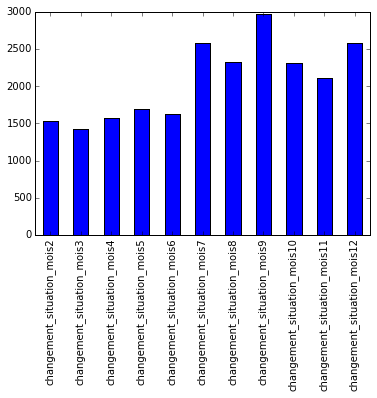

In [122]:

changement_situation_mois_list = ["changement_situation_mois{}".format(month) for month in range(2,13)]
nb_chgmt_mois_list = ["nb_chgmt_mois{}".format(mois) for mois in range(2,13)]

for month in range(2,13) : changement_situation_mois = "changement_situation_mois{}".format(month) ; sitmois_minus_one = "situation_mois{}".format(month-1); sitmois = "situation_mois{}".format(month) ; df[changement_situation_mois] = df[sitmois]!=df[sitmois_minus_one]
 
(df[changement_situation_mois_list].sum(skipna=True)).plot(kind='bar')

In [123]:
df.quelfic.value_counts() #df[df.quelfic == 'EE_CAF']['situation_mois1'].value_counts() (pour composition de EE_CAF)

FIP        0.004358
FIP_IMP    0.030431
EE&FIP     0.941329
EE         0.012962
EE_NRT     0.004556
EE_CAF     0.006364
dtype: float64

In [124]:
poids_pre_drop = df.wprm.sum(); poids_pre_drop

61255128.0

In [125]:
df = df.drop(df[df.quelfic == 'FIP'].index)

TODO: Changer les poids pour prendre en compte les droppé.

In [126]:
df.wprm.sum()

61255128.0

In [127]:
df.quelfic.value_counts()

FIP_IMP    0.030565
EE&FIP     0.945449
EE         0.013019
EE_NRT     0.004576
EE_CAF     0.006391
dtype: float64

In [128]:
df.wprm.sum()/10**6

61.255127999999999

#### Nombre d'individus par fichiers.

In [129]:
piv_quelfic_wprm = pd.pivot_table(df, values='wprm', index=[df.index],
                     columns=['quelfic'], aggfunc=np.sum).sum()  ; piv_quelfic_wprm

quelfic
EE           750922.919728
EE&FIP     57833613.284162
EE_CAF       444754.529361
EE_NRT       289275.375042
FIP_IMP     1936561.891706
dtype: float64

In [130]:
df.quelfic.value_counts(normalize = False)

FIP_IMP     2458
EE&FIP     76033
EE          1047
EE_NRT       368
EE_CAF       514
dtype: int64

In [131]:
df["revi"] = df[["revi_mois{}".format(month) for month in range(1,13)]].sum(1)
df.revi[df.revi< 10**8].head(2)

0    27124
1      905
Name: revi, dtype: float64

#### Revenu moyen imposable par fichier

In [132]:
df["revi"] = df[["revi_mois{}".format(month) for month in range(1,13)]].sum(1)
df["revi_wprm"] = df.revi[df.revi< 10**8]*df[df.revi< 10**8].wprm

pd.pivot_table(df[df.revi< 10**8], values='revi_wprm', index=df[df.revi< 10**8].index,
                     columns=['quelfic'], aggfunc=np.sum).sum() / piv_quelfic_wprm

quelfic
EE             0.000000
EE&FIP     15789.435237
EE_CAF         0.000000
EE_NRT         0.000000
FIP_IMP    12328.876923
dtype: float64

In [133]:
pd.pivot_table(df[df.revi< 10**8], values='revi_wprm', index=df[df.revi< 10**8].index,
                     columns=['quelfic'], aggfunc=np.sum).max()

quelfic
EE         0.000000e+00
EE&FIP     7.848016e+08
EE_CAF     0.000000e+00
EE_NRT     0.000000e+00
FIP_IMP    1.420585e+08
dtype: float64

In [134]:
df.shape

(80420, 723)

In [135]:
sit_mois_list = ["situation_mois{}".format(month) for month in range(1,13)]

In [136]:
df['nb_sit_mois_null'] = df[sit_mois_list].isnull().sum(1)

In [137]:
df.nb_sit_mois_null.value_counts(False)

0    80420
dtype: int64

Pas de warning, c'est du au FIP que je n'ai pas retiré dans le step 06
Warning dans step_06_montly_basis executé l 954 donne différent

```
df.nb_sit_mois_null.value_counts(False)
0     109612
12      3234
dtype: int64
```



89% du sample hors fichier FIP ont leur séquence renseignée, on va simplement prendre la dernière valeur renseignée pour compléter...

In [138]:
df.age.describe()

count    80420.000000
mean        46.994678
std         19.712592
min         14.000000
25%         31.000000
50%         47.000000
75%         62.000000
max        105.000000
Name: age, dtype: float64

In [139]:
df.trim.value_counts()

4    1
dtype: float64

In [140]:
#df.drop(dfnan.index, inplace = True)

In [141]:
piv_quelfic_wprm_2 = pd.pivot_table(df, values='wprm', index=[df.index],
                     columns=['quelfic'], aggfunc=np.sum).sum()  ; piv_quelfic_wprm

quelfic
EE           750922.919728
EE&FIP     57833613.284162
EE_CAF       444754.529361
EE_NRT       289275.375042
FIP_IMP     1936561.891706
dtype: float64

In [142]:
(piv_quelfic_wprm_2 - piv_quelfic_wprm)/piv_quelfic_wprm

quelfic
EE         0
EE&FIP     0
EE_CAF     0
EE_NRT     0
FIP_IMP    0
dtype: float64

In [143]:
df[df.age>70][['nb_sit_mois_null','quelfic']+sit_mois_list+['age','trim']][780:990].head()

,nb_sit_mois_null,quelfic,situation_mois1,situation_mois2,situation_mois3,situation_mois4,situation_mois5,situation_mois6,situation_mois7,situation_mois8,situation_mois9,situation_mois10,situation_mois11,situation_mois12,age,trim
5831,0,EE&FIP,4,4,4,4,4,4,4,4,4,4,4,4,74,4
5853,0,EE&FIP,4,4,4,4,4,4,4,4,4,4,4,4,78,4
5854,0,EE&FIP,4,4,4,4,4,4,4,4,4,4,4,4,82,4
5855,0,EE&FIP,0,0,0,0,0,0,0,0,0,0,0,6,84,4
5862,0,EE&FIP,4,4,4,4,4,4,4,4,4,4,4,4,87,4


In [144]:
#Rempli les 0 avec la séquence du mois précédent en itérant.
mois_list = range(2,13)
mois_list.reverse()
for loop in range(1,13):
    for month in mois_list:
        situation_mois = "situation_mois{}".format(month)
        situation_mois_minus_one = "situation_mois{}".format(month - 1)
        df.loc[df[situation_mois]==0,situation_mois] = df[situation_mois_minus_one]

In [145]:
##Si non executé, il semble que les retraités soient passé en inactif au dernier trimestre 2009...
#
#
#mois_list = range(9,12)
#mois_list.reverse()
#for loop in range(1,5):
#    for month in mois_list:
#        situation_mois = "situation_mois{}".format(month+1)
#        situation_mois_minus_one = "situation_mois{}".format(month)
#        df.loc[((df[situation_mois]==6)|(df[situation_mois]==5)) & (df[situation_mois_minus_one]==4) 
#               & (df.age > 55),situation_mois] = df[situation_mois_minus_one]
        

#TODO : Check if version below englobes everything

In [146]:

        
#Si non executé, certains retraités sont mis en inactif juste au dernier mois... A faire un peu mieux...
        
    
df.loc[(df["situation_mois{}".format(12)]==6) & (df["situation_mois{}".format(11)]==6) 
        & (df["situation_mois{}".format(10)]==6)
        & (df["situation_mois{}".format(9)]==0)
        & (df.age > 55) & (df["rsti"]>0), 'target_to_fill'] = True  

for month in range(1,13):
    situation_mois = "situation_mois{}".format(month)
    df.loc[df.target_to_fill == True
            , situation_mois] = 4
df.drop(["target_to_fill"],inplace=True,axis=1)




In [147]:
#rempli les Nan avec la séquence du mois suivant
mois_list = range(2,12)
mois_list.reverse()
for month in mois_list:
    situation_mois = "situation_mois{}".format(month)
    situation_mois_minus_one = "situation_mois{}".format(month - 1)
    df.loc[df[situation_mois_minus_one].isnull(),situation_mois_minus_one] = df[situation_mois]



In [148]:
df[(df.situation_mois10==6)&(df.age>55)].rga.value_counts()

1    0.015344
2    0.290193
3    0.303536
4    0.317545
5    0.073382
dtype: float64

In [149]:
for month in range(1,13): print month, (df["situation_mois{}".format(month)] == 4).value_counts(normalize= False)

1 False    59455
True     20965
dtype: int64
2 False    59521
True     20899
dtype: int64
3 False    59561
True     20859
dtype: int64
4 False    59616
True     20804
dtype: int64
5 False    59723
True     20697
dtype: int64
6 False    59821
True     20599
dtype: int64
7 False    59818
True     20602
dtype: int64
8 False    59919
True     20501
dtype: int64
9 False    59983
True     20437
dtype: int64
10 False    60058
True     20362
dtype: int64
11 False    60120
True     20300
dtype: int64
12 False    59860
True     20560
dtype: int64


In [150]:
# Passer les vieux inactifs touchants de la retraite en vieux retraités...

for month in mois_list:
    situation_mois = "situation_mois{}".format(month)
    df.loc[(df[sit_mois_list]==6).sum(1)==12,sit_mois_list] = 4

In [151]:
# Passer les vieux inactifs touchants de la retraite en vieux retraités...


for month in mois_list:
    situation_mois = "situation_mois{}".format(month)
    df.loc[(df[sit_mois_list]==6).sum(1)==12,situation_mois] = 4

In [152]:
for month in range(1,13): print month, (df["situation_mois{}".format(month)] == 4).value_counts(normalize= False)

1 False    58825
True     21595
dtype: int64
2 False    58891
True     21529
dtype: int64
3 False    58931
True     21489
dtype: int64
4 False    58986
True     21434
dtype: int64
5 False    59093
True     21327
dtype: int64
6 False    59191
True     21229
dtype: int64
7 False    59188
True     21232
dtype: int64
8 False    59289
True     21131
dtype: int64
9 False    59353
True     21067
dtype: int64
10 False    59428
True     20992
dtype: int64
11 False    59490
True     20930
dtype: int64
12 False    59230
True     21190
dtype: int64


## TODO a voir si à executer

In [153]:
#Si tout le temps inactif, plus de 50 ans et touche pension de retraite, alors on le passe en retraité
#for month in range(1,13):
#    situation_mois = "situation_mois{}".format(month)
#    df.loc[(((df[sit_mois_list]==6)|(df[sit_mois_list]==5)).sum(1)==12) & (df.age > 50) &  (df.rsti > 1), 'change_inact_to_retraite'] = True
#for month in range(1,13):
#    situation_mois = "situation_mois{}".format(month)
#    df.loc[df.change_inact_to_retraite == True, situation_mois] = 4
    
#Si tout le temps inactif, plus de 1000 euros de chomage
#for month in range(1,13):
#    situation_mois = "situation_mois{}".format(month)
#    df.loc[(((df[sit_mois_list]==6)|(df[sit_mois_list]==5)).sum(1)==12) & (df.choi > 1000), 'change_inact_to_chomr'] = True
#for month in range(1,13):
#    situation_mois = "situation_mois{}".format(month)
#    df.loc[df.change_inact_to_chomr == True, situation_mois] = 3

In [154]:
df[df.nb_sit_mois_null>0][['nb_sit_mois_null','quelfic']+sit_mois_list+['age','trim']]

,nb_sit_mois_null,quelfic,situation_mois1,situation_mois2,situation_mois3,situation_mois4,situation_mois5,situation_mois6,situation_mois7,situation_mois8,situation_mois9,situation_mois10,situation_mois11,situation_mois12,age,trim


# NRT
les enfants non-detachés vivant dans un autre foyer n'ont pas de salaire imposable déclaré.

In [155]:
df[df.quelfic == 'EE_NRT'][['nb_sit_mois_null','quelfic']+sit_mois_list+['age','trim','sali']].sali.max()

0.0

In [156]:
dfnan = df[df.nb_sit_mois_null>0]

In [157]:
dfnan[['nb_sit_mois_null','quelfic']+sit_mois_list+['age','trim','sali']]

,nb_sit_mois_null,quelfic,situation_mois1,situation_mois2,situation_mois3,situation_mois4,situation_mois5,situation_mois6,situation_mois7,situation_mois8,situation_mois9,situation_mois10,situation_mois11,situation_mois12,age,trim,sali


In [158]:
    for month in range(2,13):
        changement_situation_mois = "changement_situation_mois{}".format(month)
        sitmois_minus_one = "situation_mois{}".format(month-1)
        sitmois = "situation_mois{}".format(month)
        df[changement_situation_mois] = df[sitmois]!=df[sitmois_minus_one]
        

In [159]:
changement_situation_mois_list = ["changement_situation_mois{}".format(month) for month in range(2,13)]

In [160]:
nb_chgmt_mois_list = ["nb_chgmt_mois{}".format(mois) for mois in range(2,13)]

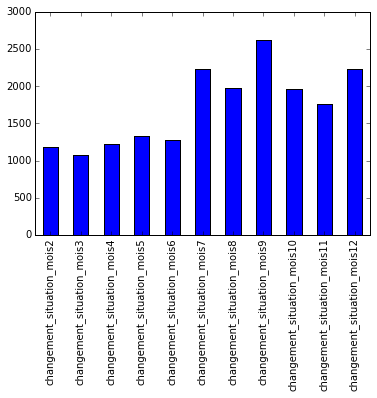

In [161]:
(df[changement_situation_mois_list].sum(skipna=True)).plot(kind='bar')

On a ce pic en octobre pour un problème de représentation des cohortes dans le sample, à priori je loupe quelque chose quelque part. 

In [162]:
df[(df.changement_situation_mois10==1) ][['nb_sit_mois_null','quelfic']+sit_mois_list+['age','trim','sali','rsti','choi','rga']].rga.value_counts()

1    0.147433
2    0.279614
3    0.235384
4    0.217590
5    0.119980
dtype: float64

Quel changement de séquences :

Activité à chomage et de chomage à activité:

In [163]:

######## Perte d'emploi #########  #Contient les passage à la retraite, en inactivité, etc
for month in range(2,13):
    changement_situation_mois = "perte_emploi_mois{}".format(month)
    sitmois_minus_one = "situation_mois{}".format(month-1)
    sitmois = "situation_mois{}".format(month)

    df[changement_situation_mois] = ((df[sitmois]!=1) & (df[sitmois_minus_one]==1))


###### Fin Perte d'emploi#####

######## Perte d'emploi sans retraite #########
for month in range(2,13):
    changement_situation_mois = "perte_emploi_sans_retraite_mois{}".format(month)
    sitmois_minus_one = "situation_mois{}".format(month-1)
    sitmois = "situation_mois{}".format(month)

    df[changement_situation_mois] = (((df[sitmois]!=1)& (df[sitmois]!=4)) & (df[sitmois_minus_one]==1))
###### Fin Perte d'emploi#####


######## Passage retraite #########
for month in range(2,13):
    changement_situation_mois = "passage_retraite_mois{}".format(month)
    sitmois_minus_one = "situation_mois{}".format(month-1)
    sitmois = "situation_mois{}".format(month)

    df[changement_situation_mois] = ((df[sitmois]==4) & ((df[sitmois_minus_one]==1)| 
                                                         (df[sitmois_minus_one]==5)| 
                                                         (df[sitmois_minus_one]==6)))
###### Fin Perte d'emploi#####


######## Gagne d'emploi #########
for month in range(2,13):
    changement_situation_mois = "gain_emploi_mois{}".format(month)
    sitmois_minus_one = "situation_mois{}".format(month-1)
    sitmois = "situation_mois{}".format(month)

    df[changement_situation_mois] = ((df[sitmois]==1) & (df[sitmois_minus_one]!=1))

######## Gagne ou perd emploi #########
dftemp = pd.DataFrame()
for month in range(2,13):
    changement_situation_mois = "changement_situation_mois{}".format(month)
    dftemp["changement_situation_mois{}".format(month)] =  (df["gain_emploi_mois{}".format(month)].replace([True,False],['gain_emploi','']) +
                                                df["perte_emploi_mois{}".format(month)].replace([True,False],['perte_emploi',''])
                                              )

######## Gagne ou perd emploi avec retraite #########
dftemp2 = pd.DataFrame()
for month in range(2,13):
    changement_situation_mois = "changement_situation_mois{}".format(month)
    dftemp2["changement_situation_mois{}".format(month)] =  (
                                                            df["gain_emploi_mois{}".format(month)
                                                              ].replace([True,False],['gain_emploi','']) +
                                                            df["perte_emploi_sans_retraite_mois{}".format(month)
                                                              ].replace([True,False],['perte_emploi',''])+
                                                            df["passage_retraite_mois{}".format(month)
                                                              ].replace([True,False],['passage_retraite',''])
                                                             )

In [164]:
for month in range(1,13): print month, (df["situation_mois{}".format(month)] == 4).value_counts(normalize= False)


1 False    58825
True     21595
dtype: int64
2 False    58891
True     21529
dtype: int64
3 False    58931
True     21489
dtype: int64
4 False    58986
True     21434
dtype: int64
5 False    59093
True     21327
dtype: int64
6 False    59191
True     21229
dtype: int64
7 False    59188
True     21232
dtype: int64
8 False    59289
True     21131
dtype: int64
9 False    59353
True     21067
dtype: int64
10 False    59428
True     20992
dtype: int64
11 False    59490
True     20930
dtype: int64
12 False    59230
True     21190
dtype: int64


In [165]:
pd.melt(dftemp2).variable.value_counts(normalize=False)

changement_situation_mois10    80420
changement_situation_mois11    80420
changement_situation_mois12    80420
changement_situation_mois8     80420
changement_situation_mois9     80420
changement_situation_mois6     80420
changement_situation_mois7     80420
changement_situation_mois4     80420
changement_situation_mois5     80420
changement_situation_mois2     80420
changement_situation_mois3     80420
dtype: int64

In [166]:
pd.melt(dftemp2).groupby(['variable', 'value'])['value'].count().unstack('value').fillna(0)

value,,gain_emploi,passage_retraite,perte_emploi
variable,,,,
changement_situation_mois10,79062,626,100,632
changement_situation_mois11,79248,530,106,536
changement_situation_mois12,79350,516,104,450
changement_situation_mois2,79609,381,102,328
changement_situation_mois3,79646,384,66,324
changement_situation_mois4,79547,434,80,359
changement_situation_mois5,79553,411,84,372
changement_situation_mois6,79552,427,57,384
changement_situation_mois7,78832,823,128,637


In [167]:
df["gain_emploi_mois{}".format(month)].replace(True,'gain_emploi').value_counts()

False          0.993584
gain_emploi    0.006416
dtype: float64

In [168]:
df3_1 = pd.melt(dftemp2)#.sum(skipna = True).plot(kind='bar', stacked = True)

In [169]:
df3_1.groupby(['variable', 'value'])['value'].count().unstack('value').fillna(0)

value,,gain_emploi,passage_retraite,perte_emploi
variable,,,,
changement_situation_mois10,79062,626,100,632
changement_situation_mois11,79248,530,106,536
changement_situation_mois12,79350,516,104,450
changement_situation_mois2,79609,381,102,328
changement_situation_mois3,79646,384,66,324
changement_situation_mois4,79547,434,80,359
changement_situation_mois5,79553,411,84,372
changement_situation_mois6,79552,427,57,384
changement_situation_mois7,78832,823,128,637


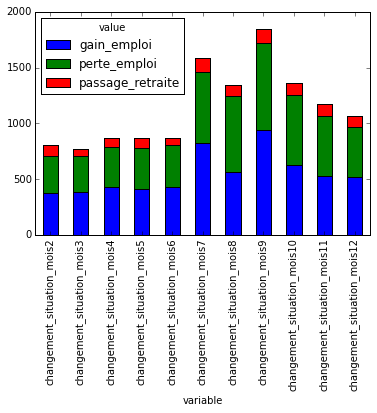

In [170]:
df3 = df3_1.groupby(['variable', 'value'])['value'].count().unstack('value').fillna(0)
month_sit = ["changement_situation_mois{}".format(month) for month in range(2,13)]
mapping = {month: i for i, month in enumerate(month_sit)}
df3.reset_index(inplace = True)
key = df3['variable'].map(mapping)
df3 = df3.iloc[key.argsort()]
df3.set_index(df3.variable, inplace = True)
df3[['gain_emploi','perte_emploi', 'passage_retraite']].plot(kind = 'bar',stacked = True)

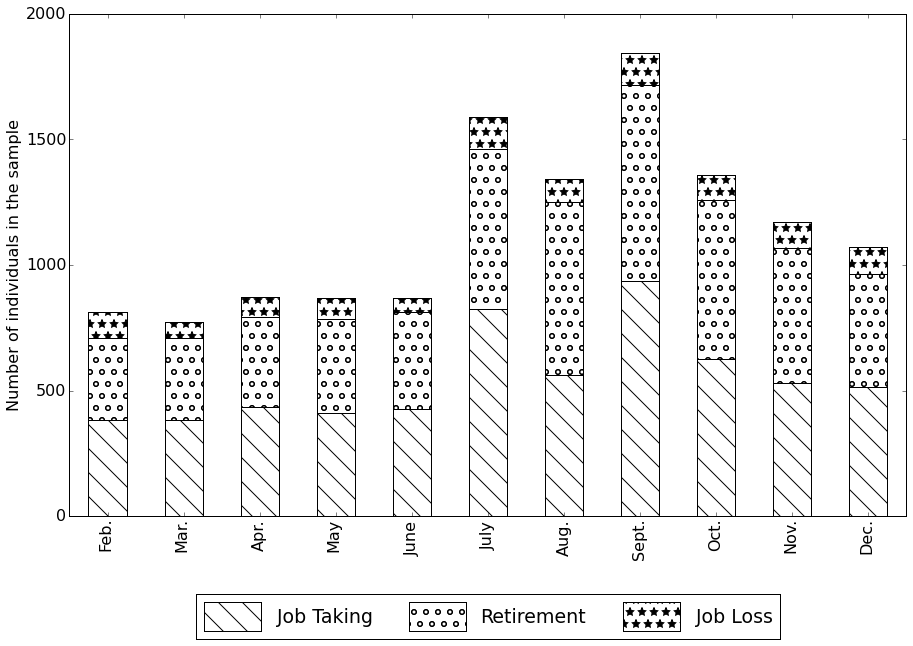

In [218]:
import matplotlib as mpl
ax = plt.figure().add_subplot(111)




df3 = df3_1.groupby(['variable', 'value'])['value'].count().unstack('value').fillna(0)
month_sit = ["changement_situation_mois{}".format(month) for month in range(2,13)]
mapping = {month: i for i, month in enumerate(month_sit)}
df3.reset_index(inplace = True)
key = df3['variable'].map(mapping)
df3 = df3.iloc[key.argsort()]
df3.set_index(df3.variable, inplace = True)
#df3[['gain_emploi','perte_emploi', 'passage_retraite']].plot(kind = 'bar',stacked = True)
to_plot = df3[['gain_emploi','perte_emploi', 'passage_retraite']]
to_plot.index = ["Feb.", "Mar.", "Apr.", "May", "June", "July", "Aug.", "Sept.", "Oct.", "Nov.", "Dec."]
to_plot.columns = ["Job Taking","Retirement", "Job Loss"]
to_plot.plot(ax=ax, kind = 'bar',stacked = True, figsize=(15,9), color ='w')

bars = ax.patches
hatches = ''.join(h*(len(df3)) for h in "\o*")
for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)
plt.ylabel("Number of individuals in the sample")
plt.legend(loc=10, ncol = 4, bbox_to_anchor=(0.5, -0.20),prop={'size':19},  handlelength=3, handleheight=2,labelspacing=0)#, markerscale = 12)
mpl.rcParams.update({'font.size': 16})

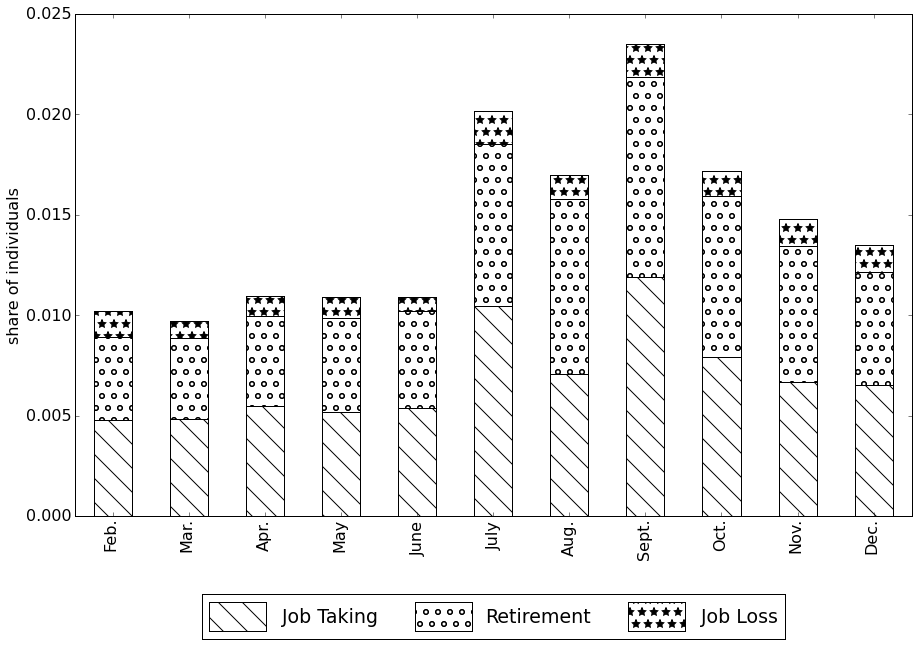

In [226]:
import matplotlib as mpl
ax = plt.figure().add_subplot(111)


hello = df3_1.groupby(['variable', 'value'])['value'].count().unstack('value').fillna(0)
hello.values
frequency = [array[0] for array in hello.values]
frequency = [[array]*4 for array in frequency]


df3 = df3_1.groupby(['variable', 'value'])['value'].count().unstack('value').fillna(0)/np.array(frequency)
month_sit = ["changement_situation_mois{}".format(month) for month in range(2,13)]
mapping = {month: i for i, month in enumerate(month_sit)}
df3.reset_index(inplace = True)
key = df3['variable'].map(mapping)
df3 = df3.iloc[key.argsort()]
df3.set_index(df3.variable, inplace = True)
#df3[['gain_emploi','perte_emploi', 'passage_retraite']].plot(kind = 'bar',stacked = True)
to_plot = df3[['gain_emploi','perte_emploi', 'passage_retraite']]
to_plot.index = ["Feb.", "Mar.", "Apr.", "May", "June", "July", "Aug.", "Sept.", "Oct.", "Nov.", "Dec."]
to_plot.columns = ["Job Taking","Retirement", "Job Loss"]
to_plot.plot(ax=ax, kind = 'bar',stacked = True, figsize=(15,9), color ='w')

bars = ax.patches
hatches = ''.join(h*(len(df3)) for h in "\o*")
for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)
plt.ylabel("share of individuals")
plt.legend(loc=10, ncol = 4, bbox_to_anchor=(0.5, -0.20),prop={'size':19},  handlelength=3, handleheight=2,labelspacing=0)#, markerscale = 12)
mpl.rcParams.update({'font.size': 16})

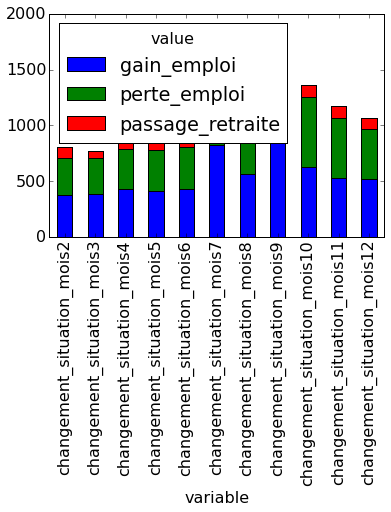

In [175]:
df3 = df3_1.groupby(['variable', 'value'])['value'].count().unstack('value').fillna(0)
month_sit = ["changement_situation_mois{}".format(month) for month in range(2,13)]
mapping = {month: i for i, month in enumerate(month_sit)}
df3.reset_index(inplace = True)
key = df3['variable'].map(mapping)
df3 = df3.iloc[key.argsort()]
df3.set_index(df3.variable, inplace = True)
df3[['gain_emploi','perte_emploi', 'passage_retraite']].plot(kind = 'bar',stacked = True)

In [176]:
mpl.rcParams.update({'font.size': 10})

In [177]:
hatches

'\\\\\\\\\\\\\\\\\\\\\\ooooooooooo***********'

In [179]:
df3.index = [ string.replace("s", "") for string in df3.variable.str[-2:]]
df3.index = df3.index.astype("int")
df3.sort_index(inplace=True)

In [180]:
total = df3[["gain_emploi", "passage_retraite", "perte_emploi"]].sum(1)
df3['sum of variations'] = total
#df3 = df3.T["sum"] = df3.T[df3.index].sum(1)

In [181]:
df3
df3 = df3.append(df3.sum(numeric_only=True), ignore_index=True)
df3


value,variable,,gain_emploi,passage_retraite,perte_emploi,sum of variations
0,changement_situation_mois2,79609,381,102,328,811
1,changement_situation_mois3,79646,384,66,324,774
2,changement_situation_mois4,79547,434,80,359,873
3,changement_situation_mois5,79553,411,84,372,867
4,changement_situation_mois6,79552,427,57,384,868
5,changement_situation_mois7,78832,823,128,637,1588
6,changement_situation_mois8,79076,561,95,688,1344
7,changement_situation_mois9,78575,937,127,781,1845
8,changement_situation_mois10,79062,626,100,632,1358
9,changement_situation_mois11,79248,530,106,536,1172


In [182]:

df3.index = ["Feb.", "Mar.", "Apr.", "May", "June", "July", "Aug.", "Sept.", "Oct.", "Nov.", "Dec.", "Total"]

In [183]:
df3 = df3.drop("variable", axis = 1)
df3.columns = [[ "No Variation", "Job Taking","Retirement", "Job Loss","Sum of Variations" ]]

In [184]:
df4 =df3.copy()

In [185]:
#df3.loc[ "Total", "No Variation"] = ""


In [186]:
df3

,No Variation,Job Taking,Retirement,Job Loss,Sum of Variations
Feb.,79609,381,102,328,811
Mar.,79646,384,66,324,774
Apr.,79547,434,80,359,873
May,79553,411,84,372,867
June,79552,427,57,384,868
July,78832,823,128,637,1588
Aug.,79076,561,95,688,1344
Sept.,78575,937,127,781,1845
Oct.,79062,626,100,632,1358
Nov.,79248,530,106,536,1172


In [187]:
print df3.to_latex()

\begin{tabular}{lrrrrr}
\toprule
{} &  No Variation &  Job Taking &  Retirement &  Job Loss &  Sum of Variations \\
\midrule
Feb.  &         79609 &         381 &         102 &       328 &                811 \\
Mar.  &         79646 &         384 &          66 &       324 &                774 \\
Apr.  &         79547 &         434 &          80 &       359 &                873 \\
May   &         79553 &         411 &          84 &       372 &                867 \\
June  &         79552 &         427 &          57 &       384 &                868 \\
July  &         78832 &         823 &         128 &       637 &               1588 \\
Aug.  &         79076 &         561 &          95 &       688 &               1344 \\
Sept. &         78575 &         937 &         127 &       781 &               1845 \\
Oct.  &         79062 &         626 &         100 &       632 &               1358 \\
Nov.  &         79248 &         530 &         106 &       536 &               1172 \\
Dec.  &        

In [188]:
df3.loc["Total"]

No Variation         872050
Job Taking             6030
Retirement             1049
Job Loss               5491
Sum of Variations     12570
Name: Total, dtype: float64

#### Table : Share of Type of Transitions

In [189]:
print pd.DataFrame(((df3.loc["Total"][["Job Taking","Retirement", "Job Loss"]]/ df3.loc["Total"]["Sum of Variations"])*100).round()).T

       Job Taking  Retirement  Job Loss
Total          48           8        44


In [190]:
df2 = pd.melt(dftemp)#.sum(skipna = True).plot(kind='bar', stacked = True)
hello = df2.groupby(['variable', 'value'])['value'].count().unstack('value').fillna(0)
frequency = [array[0] for array in hello.values]
frequency = [[array]*hello.values.shape[1] for array in frequency]
df3 = df2.groupby(['variable', 'value'])['value'].count().unstack('value').fillna(0)/np.array(frequency)
#df3 = df2.groupby(['variable', 'value'])['value'].count().unstack('value').fillna(0)/np.array(frequency)
month_sit = ["changement_situation_mois{}".format(month) for month in range(2,13)]
mapping = {month: i for i, month in enumerate(month_sit)}
df3.reset_index(inplace = True)
key = df3['variable'].map(mapping)
df3 = df3.iloc[key.argsort()]
df3.set_index(df3.variable, inplace = True)
df3[['etu_to_act','etu_to_inact','etu_to_cho']].plot(kind = 'bar',stacked = True, figsize=(15,9) )



KeyError: "['etu_to_act' 'etu_to_inact' 'etu_to_cho'] not in index"

In [191]:

######## Perte d'emploi #########  #Contient les passage à la retraite, en inactivité, etc
for month in range(2,13):
    changement_situation_mois = "perte_emploi_mois{}".format(month)
    sitmois_minus_one = "situation_mois{}".format(month-1)
    sitmois = "situation_mois{}".format(month)

    df[changement_situation_mois] = ((df[sitmois]!=1)& (df[sitmois]!=4) & (df[sitmois_minus_one]==1))

###### Fin Perte d'emploi#####



##### Passage à la retraite ####
for month in range(2,13):
    changement_situation_mois = "passage_retraite_mois{}".format(month)
    sitmois_minus_one = "situation_mois{}".format(month-1)
    sitmois = "situation_mois{}".format(month)

    df[changement_situation_mois] = ((df[sitmois]==4) & (df[sitmois_minus_one]==1)) # TODO: voir si on loupe pas d'autre retaité (voir actrec et rsti ?)


##### Fin Passage à la retraite ####





##### Sortie du chomage vers l'emploi####
for month in range(2,13):
    changement_situation_mois = "sortie_chomage_to_emploi_mois{}".format(month)
    sitmois_minus_one = "situation_mois{}".format(month-1)
    sitmois = "situation_mois{}".format(month)
    df[changement_situation_mois] = ((df[sitmois]==1) & (df[sitmois_minus_one]==3)) # TODO: voir si on loupe pas d'autre retaité (voir actrec et rsti ?)


##### Sortie du chomage vers inactivité####
for month in range(2,13):
    changement_situation_mois = "sortie_chomage_to_inactivity_mois{}".format(month)
    sitmois_minus_one = "situation_mois{}".format(month-1)
    sitmois = "situation_mois{}".format(month)
    df[changement_situation_mois] = (((df[sitmois]==5)|(df[sitmois]==6)) & (df[sitmois_minus_one]==3))

##### Sortie du inactivité vers chomage ####
for month in range(2,13):
    changement_situation_mois = "sortie_inactivity_to_chomage_mois{}".format(month)
    sitmois_minus_one = "situation_mois{}".format(month-1)
    sitmois = "situation_mois{}".format(month)
    df[changement_situation_mois] = (((df[sitmois_minus_one]==5)|(df[sitmois_minus_one]==6)) & (df[sitmois]==3))       


##### Sortie du inactivité vers l'emploi####
for month in range(2,13):
    changement_situation_mois = "sortie_inact_to_emploi_mois{}".format(month)
    sitmois_minus_one = "situation_mois{}".format(month-1)
    sitmois = "situation_mois{}".format(month)
    df[changement_situation_mois] = ((df[sitmois]==1) & ((df[sitmois_minus_one]==6)|(df[sitmois_minus_one]==5)))                                

##### Sortie du inactivité vers cho####
for month in range(2,13):
    changement_situation_mois = "sortie_inact_to_chomage_mois{}".format(month)
    sitmois_minus_one = "situation_mois{}".format(month-1)
    sitmois = "situation_mois{}".format(month)
    df[changement_situation_mois] = ((df[sitmois]==3) & ((df[sitmois_minus_one]==6)|(df[sitmois_minus_one]==5)))
    
#### Sortie études ###

for month in range(2,13):
    changement_situation_mois = "sortie_etudes_to_else{}".format(month)
    sitmois_minus_one = "situation_mois{}".format(month-1)
    sitmois = "situation_mois{}".format(month)
    df[changement_situation_mois] = ((df[sitmois_minus_one]==2) & (df[sitmois]!=2))

In [192]:
#Sortie etudes en profondeur
for month in range(2,13):
    changement_situation_mois = "sortie_etudes_to_cho{}".format(month)
    sitmois_minus_one = "situation_mois{}".format(month-1)
    sitmois = "situation_mois{}".format(month)
    df[changement_situation_mois] = ((df[sitmois_minus_one]==2) & (df[sitmois]==3))
for month in range(2,13):
    changement_situation_mois = "sortie_etudes_to_inact{}".format(month)
    sitmois_minus_one = "situation_mois{}".format(month-1)
    sitmois = "situation_mois{}".format(month)
    df[changement_situation_mois] = ((df[sitmois_minus_one]==2) & ((df[sitmois]==5)|(df[sitmois]==6)))
for month in range(2,13):
    changement_situation_mois = "sortie_etudes_to_act{}".format(month)
    sitmois_minus_one = "situation_mois{}".format(month-1)
    sitmois = "situation_mois{}".format(month)
    df[changement_situation_mois] = ((df[sitmois_minus_one]==2) & (df[sitmois]==1))

In [193]:
dftemp = pd.DataFrame()
for month in range(2,13):
    changement_situation_mois = "changement_situation_mois{}".format(month)
    dftemp["changement_situation_mois{}".format(month)] =  (df["sortie_etudes_to_act{}".format(month)].replace([True,False],['etu_to_act','']) +
                                                df["sortie_etudes_to_inact{}".format(month)].replace([True,False],['etu_to_inact','']) +
                                                df["sortie_etudes_to_cho{}".format(month)].replace([True,False],['etu_to_cho','']) 
                                                            
                                              )

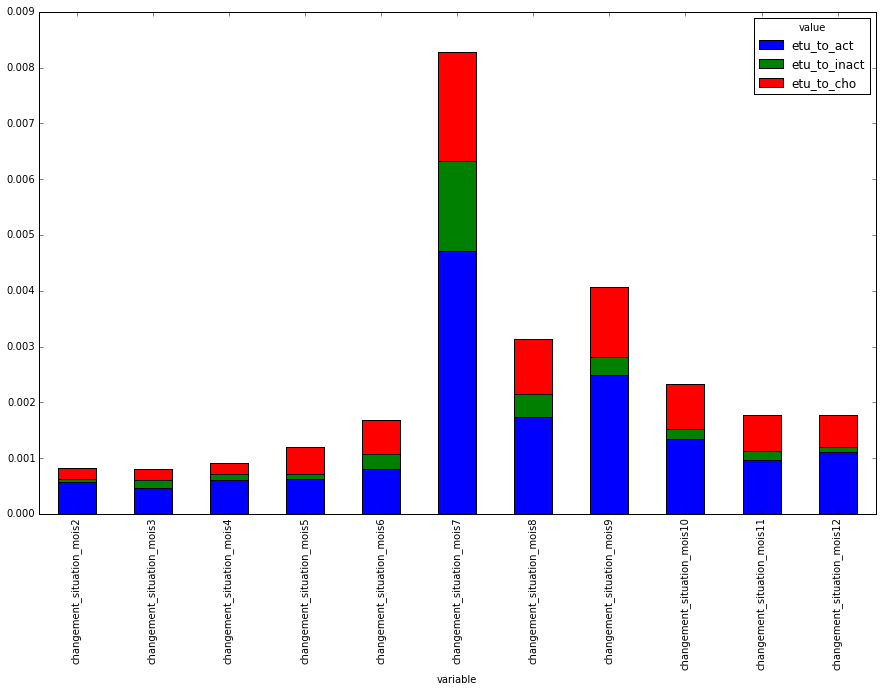

In [194]:
df2 = pd.melt(dftemp)#.sum(skipna = True).plot(kind='bar', stacked = True)
hello = df2.groupby(['variable', 'value'])['value'].count().unstack('value').fillna(0)
frequency = [array[0] for array in hello.values]
frequency = [[array]*hello.values.shape[1] for array in frequency]
df3 = df2.groupby(['variable', 'value'])['value'].count().unstack('value').fillna(0)/np.array(frequency)
#df3 = df2.groupby(['variable', 'value'])['value'].count().unstack('value').fillna(0)/np.array(frequency)
month_sit = ["changement_situation_mois{}".format(month) for month in range(2,13)]
mapping = {month: i for i, month in enumerate(month_sit)}
df3.reset_index(inplace = True)
key = df3['variable'].map(mapping)
df3 = df3.iloc[key.argsort()]
df3.set_index(df3.variable, inplace = True)
df3[['etu_to_act','etu_to_inact','etu_to_cho']].plot(kind = 'bar',stacked = True, figsize=(15,9) )

plt.savefig("sequences_etudiants.png")

In [195]:
df3.sum(0)

value
variable        changement_situation_mois2changement_situation...
                                                               11
etu_to_act                                             0.01545879
etu_to_cho                                             0.00795146
etu_to_inact                                            0.0034246
dtype: object

In [196]:
dftemp = pd.DataFrame()
for month in range(2,13):
    changement_situation_mois = "changement_situation_mois{}".format(month)
    dftemp["changement_situation_mois{}".format(month)] =  (df["perte_emploi_mois{}".format(month)].replace([True,False],['perte_emploi','']) +
                                                df["passage_retraite_mois{}".format(month)].replace([True,False],['passage_retraite','']) +
                                                
                                                 df["sortie_chomage_to_emploi_mois{}".format(month)].replace([True,False],['sortie_chomage','']) +
                                                 df["sortie_chomage_to_inactivity_mois{}".format(month)].replace([True,False],['passage_cho_to_inact','']) +
                                                 df["sortie_inact_to_chomage_mois{}".format(month)].replace([True,False],['passage_inact_to_cho','']) +           
                                                 df["sortie_inact_to_emploi_mois{}".format(month)].replace([True,False],['inact_to_act','']) +
                                                 df["sortie_etudes_to_else{}".format(month)].replace([True,False],['etu_to_else',''])
                                                            
                                              )

In [197]:
df2 = pd.melt(dftemp)#.sum(skipna = True).plot(kind='bar', stacked = True)

In [198]:
df2.groupby(['variable', 'value'])['value'].count().unstack('value').fillna(0)

value,,etu_to_else,inact_to_act,passage_cho_to_inact,passage_inact_to_cho,passage_retraite,perte_emploi,sortie_chomage
variable,,,,,,,,
changement_situation_mois10,78849,188,94,76,102,65,632,414
changement_situation_mois11,79039,144,69,105,100,61,536,366
changement_situation_mois12,79206,144,56,95,87,39,450,343
changement_situation_mois2,79555,66,61,35,56,56,328,263
changement_situation_mois3,79577,65,58,28,52,35,324,281
changement_situation_mois4,79455,74,71,39,64,52,359,306
changement_situation_mois5,79434,97,54,63,77,29,372,294
changement_situation_mois6,79409,138,48,56,54,27,384,304
changement_situation_mois7,78461,661,87,67,75,80,637,352


In [199]:
df2_1 = df2.groupby(['variable', 'value'])['value'].count().unstack('value').fillna(0)

In [200]:
total = df2_1[['etu_to_else', 'inact_to_act', 'passage_cho_to_inact',
       'passage_inact_to_cho', 'passage_retraite', 'perte_emploi',
       'sortie_chomage']].sum(1)

In [201]:
df2_1['somme'] = total

In [202]:
df2_1.index = [ string.replace("s", "") for string in df2_1.index.str[-2:]]
df2_1.index = df2_1.index.astype("int")
df2_1.sort_index(inplace=True)
df2_1.index = ["Feb.", "Mar.", "Apr.", "May", "June", "July", "Aug.", "Sept.", "Oct.", "Nov.", "Dec."]

In [203]:
df2_1.index = ["Feb.", "Mar.", "Apr.", "May", "June", "July", "Aug.", "Sept.", "Oct.", "Nov.", "Dec."]
df2_1.columns = ["sample size","student to else",  "inactive to active",  "unemployed to inactive", 
                 "inactive to unemployed",  "get retired",  "loose job",  "unemployed to employed",  "sum" ]

In [204]:
print df2_1.to_latex()

\begin{tabular}{lrrrrrrrrr}
\toprule
{} &  sample size &  student to else &  inactive to active &  unemployed to inactive &  inactive to unemployed &  get retired &  loose job &  unemployed to employed &   sum \\
\midrule
Feb.  &        79555 &               66 &                  61 &                      35 &                      56 &           56 &        328 &                     263 &   865 \\
Mar.  &        79577 &               65 &                  58 &                      28 &                      52 &           35 &        324 &                     281 &   843 \\
Apr.  &        79455 &               74 &                  71 &                      39 &                      64 &           52 &        359 &                     306 &   965 \\
May   &        79434 &               97 &                  54 &                      63 &                      77 &           29 &        372 &                     294 &   986 \\
June  &        79409 &              138 &                  48 

In [205]:
df2_1["job loss"] = df2_1["loose job"]

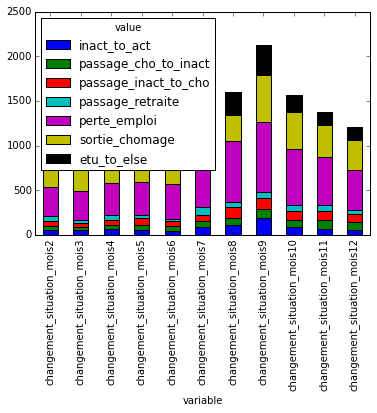

In [206]:
df3 = df2.groupby(['variable', 'value'])['value'].count().unstack('value').fillna(0)
month_sit = ["changement_situation_mois{}".format(month) for month in range(2,13)]
mapping = {month: i for i, month in enumerate(month_sit)}
df3.reset_index(inplace = True)
key = df3['variable'].map(mapping)
df3 = df3.iloc[key.argsort()]
df3.set_index(df3.variable, inplace = True)
df3[['inact_to_act','passage_cho_to_inact','passage_inact_to_cho','passage_retraite','perte_emploi','sortie_chomage','etu_to_else']].plot(kind = 'bar',stacked = True)

In [207]:
df3.iloc[2]

value
variable                changement_situation_mois4
                                             79455
etu_to_else                                     74
inact_to_act                                    71
passage_cho_to_inact                            39
passage_inact_to_cho                            64
passage_retraite                                52
perte_emploi                                   359
sortie_chomage                                 306
Name: changement_situation_mois4, dtype: object

array([<matplotlib.axes._subplots.AxesSubplot object at 0x13712d790>], dtype=object)

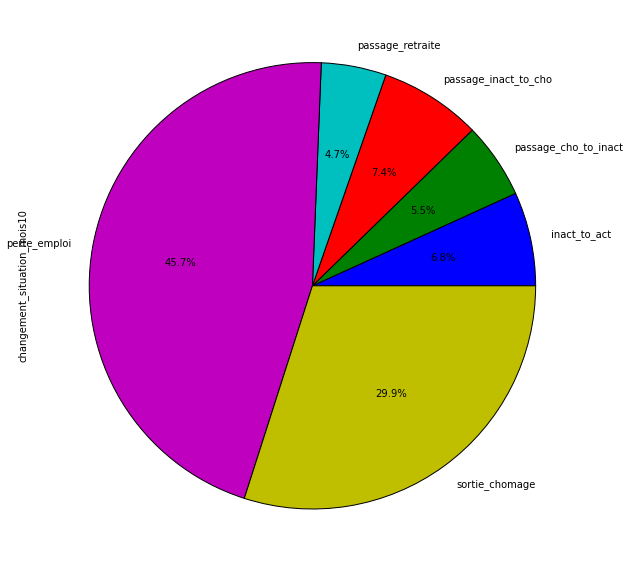

In [208]:
df3.iloc[8][['inact_to_act','passage_cho_to_inact','passage_inact_to_cho','passage_retraite','perte_emploi','sortie_chomage']].plot(
    kind = 'pie',subplots= True, figsize = (10,10), autopct='%1.1f%%')

In [209]:
#sommé sur l'année

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1486995d0>], dtype=object)

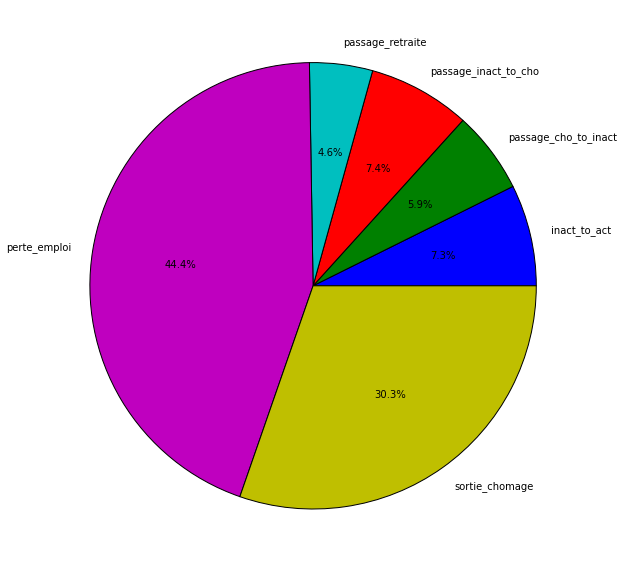

In [210]:
df3.sum(0)[['inact_to_act','passage_cho_to_inact','passage_inact_to_cho','passage_retraite','perte_emploi','sortie_chomage']].plot(
    kind = 'pie',subplots= True, figsize = (10,10), autopct='%1.1f%%', label='')
#plt.savefig("sequences_camembert.png")


array([<matplotlib.axes._subplots.AxesSubplot object at 0x13b80fc50>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1384280d0>], dtype=object)

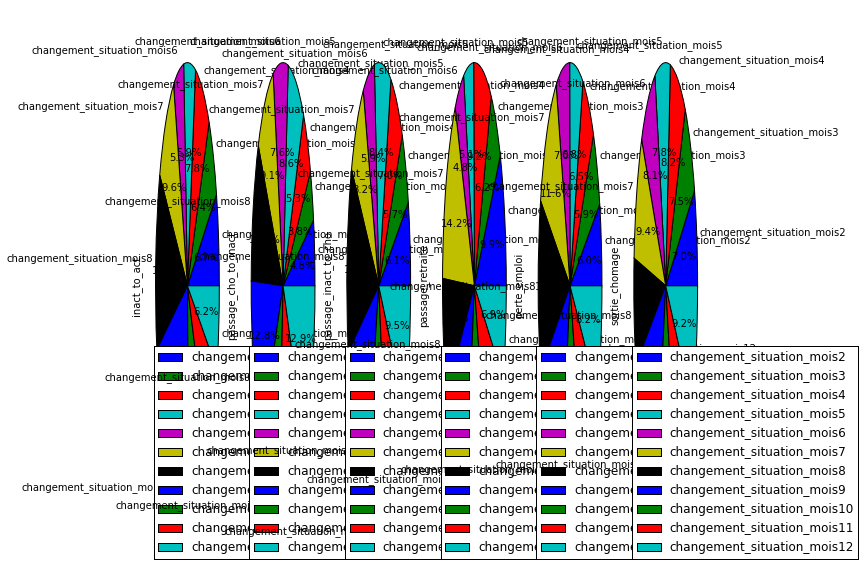

In [211]:
df3[['inact_to_act','passage_cho_to_inact','passage_inact_to_cho','passage_retraite','perte_emploi','sortie_chomage']].plot(
    kind = 'pie',subplots= True, figsize = (10,10), autopct='%1.1f%%')

In [212]:

hello = df2.groupby(['variable', 'value'])['value'].count().unstack('value').fillna(0)
hello.values
frequency = [array[0] for array in hello.values] ; [[array]*6 for array in frequency]
#frequency2 = [array[0] for array in frequency]

[[78849, 78849, 78849, 78849, 78849, 78849],
 [79039, 79039, 79039, 79039, 79039, 79039],
 [79206, 79206, 79206, 79206, 79206, 79206],
 [79555, 79555, 79555, 79555, 79555, 79555],
 [79577, 79577, 79577, 79577, 79577, 79577],
 [79455, 79455, 79455, 79455, 79455, 79455],
 [79434, 79434, 79434, 79434, 79434, 79434],
 [79409, 79409, 79409, 79409, 79409, 79409],
 [78461, 78461, 78461, 78461, 78461, 78461],
 [78823, 78823, 78823, 78823, 78823, 78823],
 [78293, 78293, 78293, 78293, 78293, 78293]]

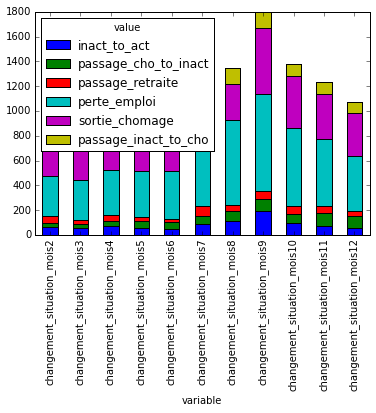

In [213]:
df3 = df2.groupby(['variable', 'value'])['value'].count().unstack('value').fillna(0)
month_sit = ["changement_situation_mois{}".format(month) for month in range(2,13)]

#month_sit = ["Feb.", "Mar.", "Apr.", "May", "June", "July", "Aug.", "Sept.", "Oct.", "Nov.", "Dec."]


mapping = {month: i for i, month in enumerate(month_sit)}
df3.reset_index(inplace = True)
key = df3['variable'].map(mapping)
df3 = df3.iloc[key.argsort()]
df3.set_index(df3.variable, inplace = True)
df3[['inact_to_act','passage_cho_to_inact','passage_retraite','perte_emploi','sortie_chomage','passage_inact_to_cho']].plot(kind = 'bar',stacked = True)

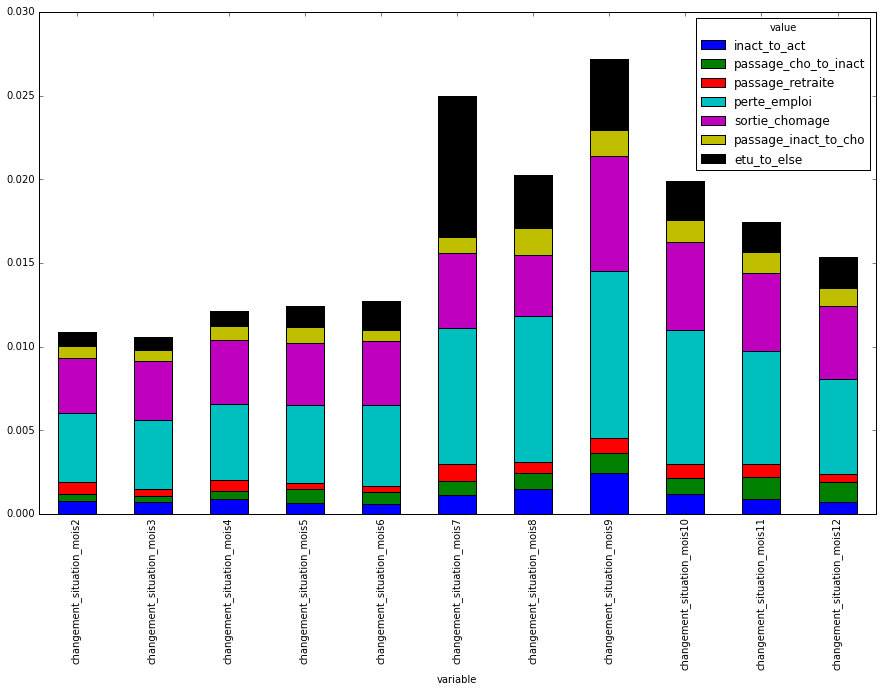

In [214]:
frequency = [array[0] for array in hello.values]
frequency = [[array]*hello.values.shape[1] for array in frequency]
df3 = df2.groupby(['variable', 'value'])['value'].count().unstack('value').fillna(0)/np.array(frequency)
#df3 = df2.groupby(['variable', 'value'])['value'].count().unstack('value').fillna(0)/np.array(frequency)
month_sit = ["changement_situation_mois{}".format(month) for month in range(2,13)]
mapping = {month: i for i, month in enumerate(month_sit)}
df3.reset_index(inplace = True)
key = df3['variable'].map(mapping)
df3 = df3.iloc[key.argsort()]
df3.set_index(df3.variable, inplace = True)
df3[['inact_to_act','passage_cho_to_inact','passage_retraite','perte_emploi','sortie_chomage','passage_inact_to_cho','etu_to_else']].plot(kind = 'bar',stacked = True, figsize=(15,9) )

plt.savefig('passage_barplot.png')


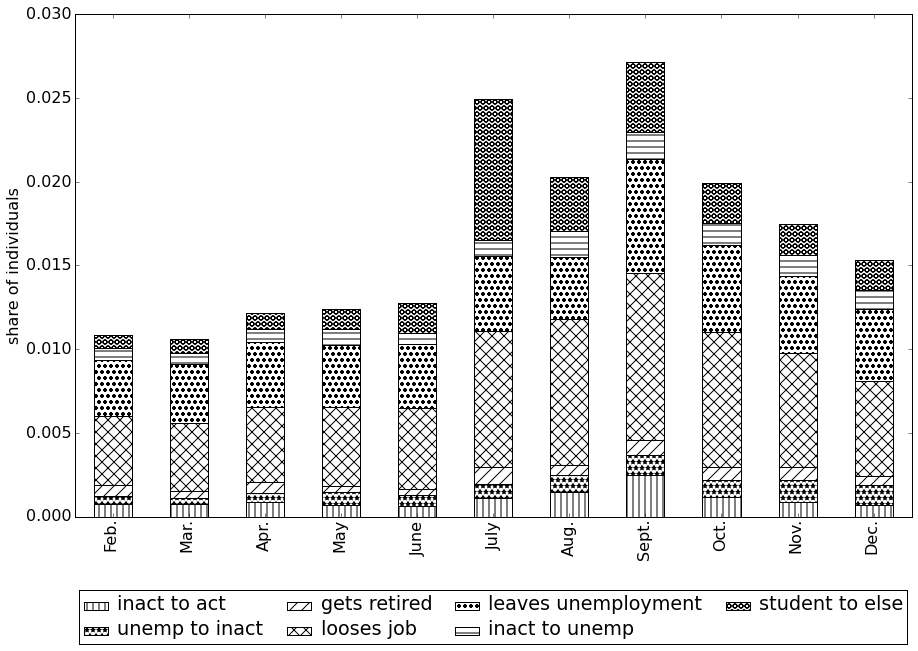

In [215]:
import matplotlib as mpl
ax = plt.figure().add_subplot(111)

frequency = [array[0] for array in hello.values]
frequency = [[array]*hello.values.shape[1] for array in frequency]
df3 = df2.groupby(['variable', 'value'])['value'].count().unstack('value').fillna(0)/np.array(frequency)
#df3 = df2.groupby(['variable', 'value'])['value'].count().unstack('value').fillna(0)/np.array(frequency)
month_sit = ["changement_situation_mois{}".format(month) for month in range(2,13)]
mapping = {month: i for i, month in enumerate(month_sit)}
df3.reset_index(inplace = True)
key = df3['variable'].map(mapping)
df3 = df3.iloc[key.argsort()]
df3.set_index(df3.variable, inplace = True)
to_plot = df3[['inact_to_act','passage_cho_to_inact','passage_retraite','perte_emploi','sortie_chomage','passage_inact_to_cho','etu_to_else']]
to_plot.index = ["Feb.", "Mar.", "Apr.", "May", "June", "July", "Aug.", "Sept.", "Oct.", "Nov.", "Dec."]
to_plot.columns = [u'inact to act', u'unemp to inact', u'gets retired',
       u'looses job', u'leaves unemployment', u'inact to unemp',
       u'student to else']
to_plot.plot(ax=ax, kind = 'bar',stacked = True, figsize=(15,9), color ='w')#,hatch = [ "*" ] )
bars = ax.patches
hatches = ''.join(h*(len(df3)) for h in "|*/xo-O")
for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch*2)
plt.ylabel("share of individuals")
plt.legend(loc=10, ncol = 4, bbox_to_anchor=(0.5, -0.20))
mpl.rcParams.update({'font.size': 16})
plt.savefig('passage_barplot.png')


In [216]:
''.join(h*(7) for h in "|*/xo-")

'|||||||*******///////xxxxxxxooooooo-------'

In [178]:
[ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*" ]

['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']

In [217]:
frequency

[[78849, 78849, 78849, 78849, 78849, 78849, 78849, 78849],
 [79039, 79039, 79039, 79039, 79039, 79039, 79039, 79039],
 [79206, 79206, 79206, 79206, 79206, 79206, 79206, 79206],
 [79555, 79555, 79555, 79555, 79555, 79555, 79555, 79555],
 [79577, 79577, 79577, 79577, 79577, 79577, 79577, 79577],
 [79455, 79455, 79455, 79455, 79455, 79455, 79455, 79455],
 [79434, 79434, 79434, 79434, 79434, 79434, 79434, 79434],
 [79409, 79409, 79409, 79409, 79409, 79409, 79409, 79409],
 [78461, 78461, 78461, 78461, 78461, 78461, 78461, 78461],
 [78823, 78823, 78823, 78823, 78823, 78823, 78823, 78823],
 [78293, 78293, 78293, 78293, 78293, 78293, 78293, 78293]]

In [180]:
hello.values.shape

(11, 8)

In [181]:
#frequency = [array[0] for array in hello.values]
#frequency = [[array]*6 for array in frequency]
#df3 = df2.groupby(['variable', 'value'])['value'].count().unstack('value').fillna(0)/np.array(frequency)
##df3 = df2.groupby(['variable', 'value'])['value'].count().unstack('value').fillna(0)/np.array(frequency)
#month_sit = ["changement_situation_mois{}".format(month) for month in range(2,13)]
#mapping = {month: i for i, month in enumerate(month_sit)}
#df3.reset_index(inplace = True)
#key = df3['variable'].map(mapping)
#df3 = df3.iloc[key.argsort()]
#df3.set_index(df3.variable, inplace = True)
#df3[['inact_to_act','passage_cho_to_inact','passage_retraite','perte_emploi','sortie_chomage']].plot(kind = 'bar',stacked = True, figsize=(15,9) )

# Imputations des revenus mensuel :

In [182]:
##### Assigniation des sali choi et rsti mensuel####

nb_mois_actif = (df[sit_mois_list]==1).sum(1)
nb_mois_chomeur = (df[sit_mois_list]==3).sum(1)
nb_mois_ss_rev_act = ((df[sit_mois_list]== 2) | (df[sit_mois_list]== 4)| (df[sit_mois_list]== 5) |  (df[sit_mois_list]== 6)).sum(1)
nb_mois_retraite = (df[sit_mois_list]==4).sum(1)  #les séquences des retraités sont bisare, parfois renségnées parfois non


# Nb de mois de retraite : si retraité == 4 sur un mois et jamais égal à 1,3,5,6 alors nb_mois = 12

est_retraite_during_year = ((df[sit_mois_list]==4).sum(1) <12) & ((df[sit_mois_list]==4).sum(1) >0)



is_in_target_sample = (df.rga == 6) | (df.rga == 5) | (df.rga == 4)
df["is_in_target_sample"] = is_in_target_sample


nest_pas_retraite_during_year = (((df[sit_mois_list]==4).sum(1) >1)                 #TODO : regarder la différence entre NaN et 0 dans situation_mois
                                    | ((df[sit_mois_list]==3).sum(1) >1)
                                    | ((df[sit_mois_list]==5).sum(1) >1)
                                    | ((df[sit_mois_list]==6).sum(1) >1))

df[est_retraite_during_year & nest_pas_retraite_during_year & is_in_target_sample]==0 #TODO : le matin, mettre les is_in_target_sample dans le step one !

for month in range(1,13):
    sitmois = "situation_mois{}".format(month)
    salaire_mois = "sali_mois{}".format(month)
    chomage_mois = "choi_mois{}".format(month)
    retraite_mois = "rsti_mois{}".format(month)
    revenu_mois = "revi_mois{}".format(month)


    df[salaire_mois] = df[(df[sitmois] == 1)]['sali']/nb_mois_actif
    #indivi[salaire_mois] = indivi[(indivi[sitmois] == 1) & (indivi[nb_mois_actif>0 ])]['sali']/nb_mois_actif
    df[chomage_mois] = df[df[sitmois] == 3]['choi']/nb_mois_chomeur
    df[retraite_mois] = df[df[sitmois] == 4]['rsti']/nb_mois_retraite
    df[retraite_mois] = df[df[sitmois] == 2]['rsti']/nb_mois_retraite

    df[revenu_mois] = df[salaire_mois].fillna(0) + df[chomage_mois].fillna(0) + df[retraite_mois].fillna(0)
revenu_mois_list = ["revi_mois{}".format(month) for month in range(1,13)]

In [183]:
df.choi_mois1.mean()

555.67069039724618

Warning : on a 450.93 dans step_06 contre 443.61 ici

In [184]:
df[df[sitmois] == 3].shape

(5371, 870)

In [185]:
df[df.revi_mois2.values == np.inf][revenu_mois_list+['sali','rsti','choi']+sit_mois_list]

,revi_mois1,revi_mois2,revi_mois3,revi_mois4,revi_mois5,revi_mois6,revi_mois7,revi_mois8,revi_mois9,revi_mois10,revi_mois11,revi_mois12,sali,rsti,choi,situation_mois1,situation_mois2,situation_mois3,situation_mois4,situation_mois5,situation_mois6,situation_mois7,situation_mois8,situation_mois9,situation_mois10,situation_mois11,situation_mois12
884,126.125000,inf,1713.000000,126.125000,126.125000,126.125000,1713.000000,1713.000000,126.125000,126.125000,126.125000,126.125000,5139,563,1009,3,2,1,3,3,3,1,1,3,3,3,3
1916,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,0,1066,0,2,2,2,2,2,2,2,2,2,2,2,2
3280,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,0,11600,0,2,2,2,2,2,2,2,2,2,2,2,2
3490,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,0,1848,0,2,2,2,2,2,2,2,2,2,2,2,2
3969,inf,inf,inf,inf,inf,inf,2885.000000,2885.000000,2885.000000,inf,inf,2033.000000,2033,5753,8655,2,2,2,2,2,2,3,3,3,2,2,1
5971,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,0,22242,0,2,2,2,2,2,2,2,2,2,2,2,2
8833,inf,inf,inf,710.500000,710.500000,inf,inf,inf,148.500000,148.500000,710.500000,710.500000,2842,3309,297,2,2,2,1,1,2,2,2,3,3,1,1
10091,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,0,5823,0,2,2,2,2,2,2,2,2,2,2,2,2
10366,inf,inf,inf,inf,inf,inf,8361.000000,inf,inf,inf,inf,inf,8361,354,0,2,2,2,2,2,2,1,2,2,2,2,2
10618,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,2154,5753,0,2,2,2,2,2,2,2,2,2,2,2,2


In [186]:
df_revi_inf = df[df.revi_mois2.values == np.inf][revenu_mois_list+['sali','rsti','choi']+sit_mois_list]

In [187]:
(df_revi_inf[revenu_mois_list]==np.inf).sum(1).value_counts() #mettre les revenus en divisé par mois pour ceux à l'infini

1     0.011494
2     0.011494
3     0.011494
4     0.011494
5     0.034483
6     0.057471
7     0.011494
8     0.045977
9     0.080460
10    0.022989
11    0.045977
12    0.655172
dtype: float64

In [188]:
df_revi_inf[(df_revi_inf[revenu_mois_list]==np.inf).sum(1)==12]

,revi_mois1,revi_mois2,revi_mois3,revi_mois4,revi_mois5,revi_mois6,revi_mois7,revi_mois8,revi_mois9,revi_mois10,revi_mois11,revi_mois12,sali,rsti,choi,situation_mois1,situation_mois2,situation_mois3,situation_mois4,situation_mois5,situation_mois6,situation_mois7,situation_mois8,situation_mois9,situation_mois10,situation_mois11,situation_mois12
1916,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,0,1066,0,2,2,2,2,2,2,2,2,2,2,2,2
3280,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,0,11600,0,2,2,2,2,2,2,2,2,2,2,2,2
3490,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,0,1848,0,2,2,2,2,2,2,2,2,2,2,2,2
5971,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,0,22242,0,2,2,2,2,2,2,2,2,2,2,2,2
10091,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,0,5823,0,2,2,2,2,2,2,2,2,2,2,2,2
10618,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,2154,5753,0,2,2,2,2,2,2,2,2,2,2,2,2
10921,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,0,250,0,2,2,2,2,2,2,2,2,2,2,2,2
11269,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,1744,706,0,2,2,2,2,2,2,2,2,2,2,2,2
11366,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,0,2530,0,2,2,2,2,2,2,2,2,2,2,2,2
12074,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,0,5021,0,2,2,2,2,2,2,2,2,2,2,2,2


In [189]:
#94 individus ont des revenus infini
df[(df[revenu_mois_list]==np.inf).sum(1)>0].shape

(98, 870)

In [190]:

for month in range(1,13):
    sitmois = "situation_mois{}".format(month)
    salaire_mois = "sali_mois{}".format(month)
    chomage_mois = "choi_mois{}".format(month)
    retraite_mois = "rsti_mois{}".format(month)
    revenu_mois = "revi_mois{}".format(month)
    
    df.loc[(df[revenu_mois_list]==np.inf).sum(1)>0, revenu_mois] = (df['sali'] + df['rsti'] + df['choi'])/12

In [191]:


print df.sali_mois1.mean() #1683 dans step06 au lieu de 1763
df.revi_mois1.mean() #Warning donne 989 dans step06 au lieu de 722

1818.53385277


906.31716495747605

In [192]:
df.revi_mois1.max()

110274.0

In [193]:
df.sort('revi_mois1', ascending = False)[revenu_mois_list+sit_mois_list+['sali','rsti','choi','age']]

,revi_mois1,revi_mois2,revi_mois3,revi_mois4,revi_mois5,revi_mois6,revi_mois7,revi_mois8,revi_mois9,revi_mois10,revi_mois11,revi_mois12,situation_mois1,situation_mois2,situation_mois3,situation_mois4,situation_mois5,situation_mois6,situation_mois7,situation_mois8,situation_mois9,situation_mois10,situation_mois11,situation_mois12,sali,rsti,choi,age
73768,110274.000000,3115.090909,3115.090909,3115.090909,3115.090909,3115.090909,3115.090909,3115.090909,3115.090909,3115.090909,3115.090909,3115.090909,1,3,3,3,3,3,3,3,3,3,3,3,110274,0,34266,36
26885,69274.000000,69274.000000,69274.000000,69274.000000,69274.000000,69274.000000,69274.000000,69274.000000,69274.000000,69274.000000,69274.000000,69274.000000,1,1,1,1,1,1,1,1,1,1,1,1,831288,0,0,49
33099,69166.666667,69166.666667,69166.666667,69166.666667,69166.666667,69166.666667,69166.666667,69166.666667,69166.666667,69166.666667,69166.666667,69166.666667,1,1,1,1,1,1,1,1,1,1,1,1,830000,0,0,39
10495,67261.000000,67261.000000,67261.000000,67261.000000,67261.000000,67261.000000,67261.000000,67261.000000,67261.000000,67261.000000,67261.000000,67261.000000,1,1,1,1,1,1,1,1,1,1,1,1,807132,0,0,51
46817,62937.833333,62937.833333,62937.833333,62937.833333,62937.833333,62937.833333,62937.833333,62937.833333,62937.833333,62937.833333,62937.833333,62937.833333,1,1,1,1,1,1,1,1,1,1,1,1,755254,0,0,58
60768,43071.500000,43071.500000,43071.500000,43071.500000,43071.500000,43071.500000,43071.500000,43071.500000,43071.500000,43071.500000,43071.500000,43071.500000,1,1,1,1,1,1,1,1,1,1,1,1,516858,0,0,48
43272,41039.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,3,3,3,3,3,3,3,3,3,3,3,41039,0,0,52
28412,38054.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,4,4,4,4,4,4,4,4,4,4,4,38054,0,0,54
19286,36551.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3,1,1,1,1,1,1,1,1,1,1,1,0,0,36551,56
58538,36134.250000,36134.250000,36134.250000,36134.250000,36134.250000,36134.250000,36134.250000,36134.250000,36134.250000,36134.250000,36134.250000,36134.250000,1,1,1,1,1,1,1,1,1,1,1,1,433611,0,0,38


Si un individu a 0 sur tout les mois sauf 1, il faut peut être redistribuer, concerne 231 individus

In [194]:
df[((df[revenu_mois_list]==0).sum(1)==11)].sort('revi_mois12', ascending = False)[revenu_mois_list+sit_mois_list+['sali','rsti','choi','age']]

,revi_mois1,revi_mois2,revi_mois3,revi_mois4,revi_mois5,revi_mois6,revi_mois7,revi_mois8,revi_mois9,revi_mois10,revi_mois11,revi_mois12,situation_mois1,situation_mois2,situation_mois3,situation_mois4,situation_mois5,situation_mois6,situation_mois7,situation_mois8,situation_mois9,situation_mois10,situation_mois11,situation_mois12,sali,rsti,choi,age
13083,0,0,0,0,0,0,0,0,0,0,0,135919,4,4,4,4,4,4,4,4,4,4,4,1,135919,35745,0,64
4581,0,0,0,0,0,0,0,0,0,0,0,63410,0,0,0,0,0,0,0,0,0,0,0,1,63410,0,0,50
15039,0,0,0,0,0,0,0,0,0,0,0,55386,0,0,0,0,0,0,0,0,0,0,0,1,55386,0,0,51
52080,0,0,0,0,0,0,0,0,0,0,0,46535,2,2,2,2,2,2,2,2,2,2,2,1,46535,0,0,24
50265,0,0,0,0,0,0,0,0,0,0,0,33166,0,0,0,0,0,0,0,0,0,0,0,1,33166,0,0,55
21133,0,0,0,0,0,0,0,0,0,0,0,26392,4,4,4,4,4,4,4,4,4,4,4,1,26392,15684,0,56
30115,0,0,0,0,0,0,0,0,0,0,0,24378,0,0,0,0,0,0,0,0,0,0,0,1,24378,0,0,44
40614,0,0,0,0,0,0,0,0,0,0,0,22778,5,5,5,5,5,5,5,5,5,5,5,1,22778,0,0,33
21615,0,0,0,0,0,0,0,0,0,0,0,21373,6,6,6,6,6,6,6,6,6,6,6,1,21373,0,0,30
23795,0,0,0,0,0,0,0,0,0,0,0,20445,0,0,0,0,0,0,0,0,0,0,0,1,20445,0,0,24


In [195]:
original_df.iloc[4967]['sali']

52286.0

In [196]:
((df[revenu_mois_list]==0).sum(1)==11)

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
30       False
31       False
32       False
33       False
34       False
35       False
36       False
37       False
38       False
39       False
40       False
41       False
42       False
43       False
44       False
45       False
46       False
47       False
48       False
49       False
         ...  
80370    False
80371    False
80372    False
80373     True
80374    False
80375    False
80376    False
80377    False
80378    False
80379    False
80380    False
80381    False
80382    False
80383    False
80384    False
80385    F

In [197]:
df.head(10)[revenu_mois_list]


,revi_mois1,revi_mois2,revi_mois3,revi_mois4,revi_mois5,revi_mois6,revi_mois7,revi_mois8,revi_mois9,revi_mois10,revi_mois11,revi_mois12
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,733.400000,733.400000,879.428571,879.428571,879.428571,879.428571,879.428571,879.428571,879.428571,733.400000,733.400000,733.400000
7,0.000000,0.000000,0.000000,0.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,0.000000,0.000000,0.000000
8,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000
9,1867.166667,1867.166667,1867.166667,1867.166667,1867.166667,1867.166667,1867.166667,1867.166667,1867.166667,1867.166667,1867.166667,1867.166667


In [198]:
print df[revenu_mois_list].max(1).mean()
print df[revenu_mois_list].min(1).mean()

974.672792532
826.772507795


Warning donne 1361 et 934 dans step_06 pourquoi !

In [199]:
df["diff_rev"] = df[revenu_mois_list].max(1) - df[revenu_mois_list].min(1)

In [200]:
df.diff_rev.mean()

147.90028473619554

In [201]:
df.diff_rev.describe()

count     80420.000000
mean        147.900285
std        1103.193286
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      135919.000000
Name: diff_rev, dtype: float64

In [202]:
filter_income = (df.sali>0)|(df.rsti>0)|(df.choi>0)
df[filter_income].shape

(64747, 871)

In [203]:
df[filter_income & (df.diff_rev<100)].shape[0]/df[filter_income].shape[0]

0.8983736698225401

In [204]:
%time
income_rep_func =[df[filter_income & (df.diff_rev<value)].shape[0]/df[filter_income].shape[0] for value in range(0,10000,100)]

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 6.91 µs


In [205]:
#range_to_use = range(1,7000,20)
#plt.figure(figsize=(15,9))
#plt.plot(range_to_use[1:],income_rep_func[1:],label = 'Share of max variation during year')
#plt.legend(bbox_to_anchor=(1, 0.2))
#plt.grid()


CPU times: user 3min 56s, sys: 2min 35s, total: 6min 32s
Wall time: 6min 47s


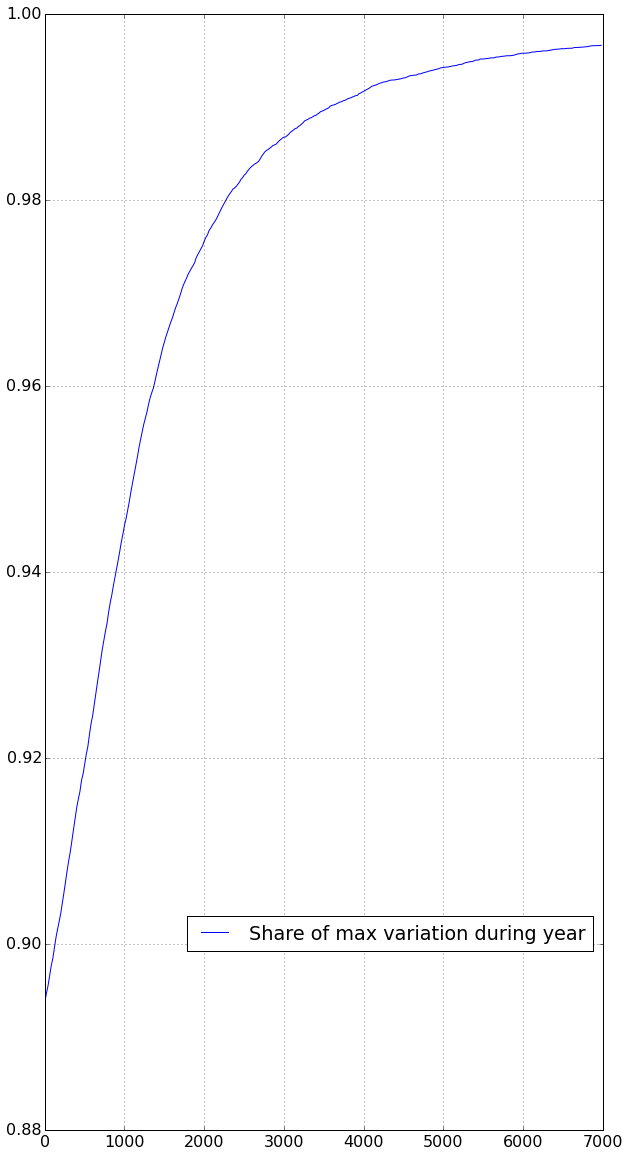

In [206]:
%%time
range_to_use = range(1,7000,20)
income_rep_func =[df[filter_income & (df.diff_rev<income)].shape[0]/df[filter_income].shape[0] for income in range_to_use]
plt.figure(figsize = (10,20))
plt.plot(range_to_use,income_rep_func,label = 'Share of max variation during year')
plt.legend(bbox_to_anchor=(1, 0.2))
plt.grid()



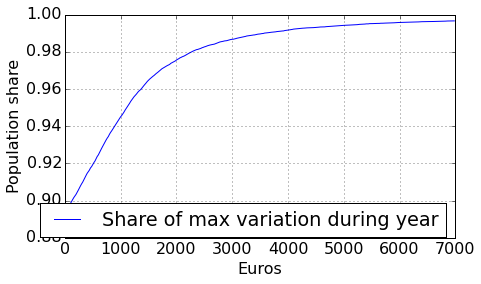

In [207]:
plt.figure(figsize = (7,4))
plt.plot(range_to_use,income_rep_func,label = 'Share of max variation during year')
plt.legend(bbox_to_anchor=(1, 0.2))
plt.grid()
plt.savefig('share_of_max_variation.png')
plt.xlabel('Euros')
plt.ylabel("Population share")

(0, 800)

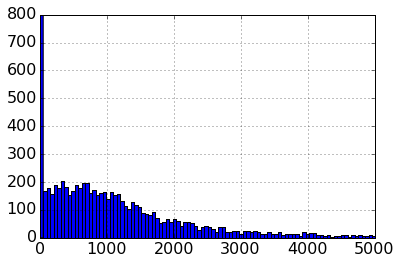

In [208]:
df.diff_rev.hist(bins = 2600)
plt.xlim(0,5000)
plt.ylim(0,800)

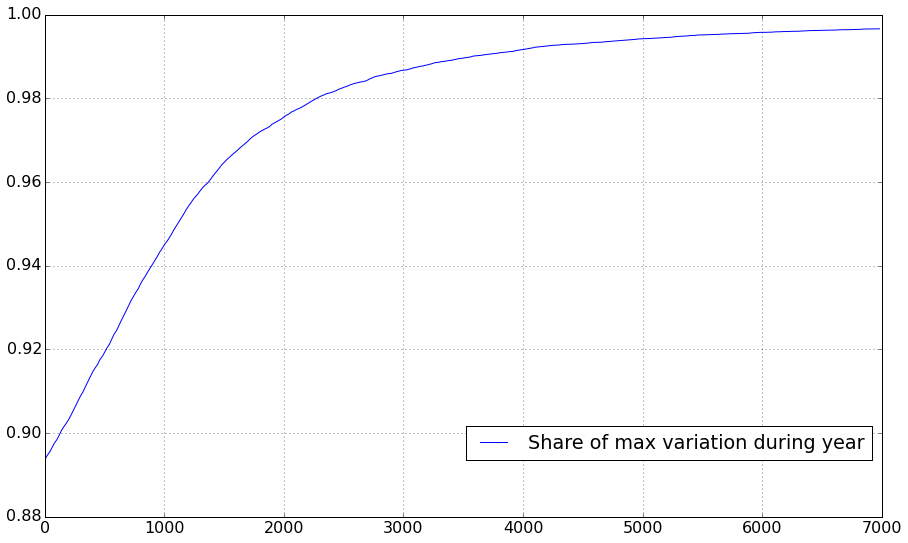

In [209]:
plt.figure(figsize=(15,9))
plt.plot(range_to_use,income_rep_func,label = 'Share of max variation during year')
plt.legend(bbox_to_anchor=(1, 0.2))
plt.grid()
plt.figure(figsize = (10,20))


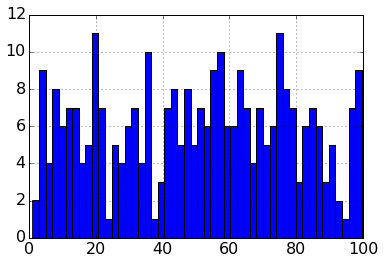

In [210]:
df[(df.diff_rev>1)&(df.diff_rev<100)].diff_rev.hist(bins = 50)

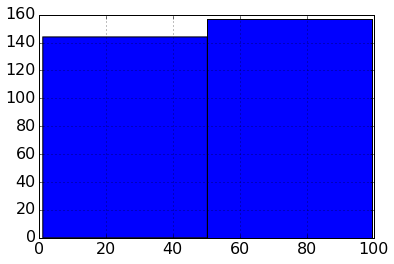

In [211]:
df[(df.diff_rev>1)&(df.diff_rev<100)].diff_rev.hist(bins = 2)

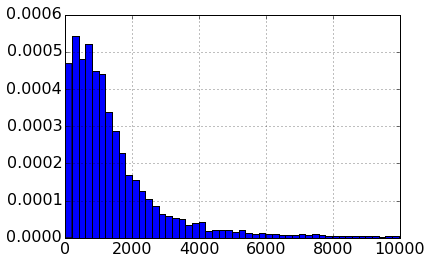

In [212]:
#Relatif
df[(df.diff_rev>10)&(df.diff_rev<10000)].diff_rev.hist(bins = 50, normed = True)

/usr/local/lib/python2.7/site-packages/pandas/core/frame.py:1825: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


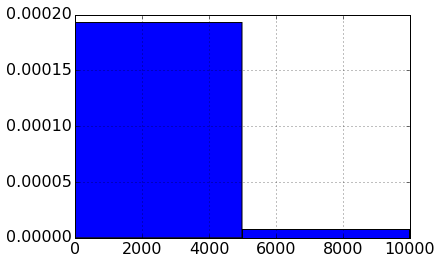

In [213]:
#Relatif
df[filter_income][(df.diff_rev>10)&(df.diff_rev<10000)].diff_rev.hist(bins = 2, normed = True)

In [214]:
df_ols = df[['age','sali','rsti','choi']]

In [215]:
pd.ols(y = df[(df.diff_rev>10)&(df.diff_rev<10000)].diff_rev, x = df_ols)


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <age> + <sali> + <rsti> + <choi> + <intercept>

Number of Observations:         6745
Number of Degrees of Freedom:   5

R-squared:         0.2993
Adj R-squared:     0.2989

Rmse:           1252.8884

F-stat (4, 6740):   719.6553, p-value:     0.0000

Degrees of Freedom: model 4, resid 6740

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
           age    -1.7910     1.2866      -1.39     0.1640    -4.3126     0.7307
          sali     0.0888     0.0018      49.75     0.0000     0.0853     0.0923
          rsti     0.0610     0.0044      13.98     0.0000     0.0524     0.0695
          choi     0.0682     0.0037      18.61     0.0000     0.0610     0.0754
     intercept   501.7204    47.2375      10.

In [216]:
(df.diff_rev>100).value_counts(False)

False    73840
True      6580
dtype: int64

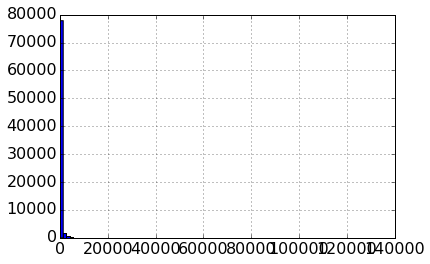

In [217]:
df.diff_rev.hist(bins = 100)

In [218]:
df[(df.diff_rev>1000)][revenu_mois_list+sit_mois_list+['sali','rsti','choi','age']]

,revi_mois1,revi_mois2,revi_mois3,revi_mois4,revi_mois5,revi_mois6,revi_mois7,revi_mois8,revi_mois9,revi_mois10,revi_mois11,revi_mois12,situation_mois1,situation_mois2,situation_mois3,situation_mois4,situation_mois5,situation_mois6,situation_mois7,situation_mois8,situation_mois9,situation_mois10,situation_mois11,situation_mois12,sali,rsti,choi,age
7,0.000000,0.000000,0.000000,0.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,0.000000,0.000000,0.000000,2,2,2,2,1,1,1,1,1,3,3,3,12420,0,0,33
13,947.100000,947.100000,947.100000,947.100000,947.100000,947.100000,3119.000000,3119.000000,947.100000,947.100000,947.100000,947.100000,1,1,1,1,1,1,3,3,1,1,1,1,9471,0,6238,30
36,745.636364,745.636364,745.636364,745.636364,745.636364,745.636364,745.636364,745.636364,745.636364,745.636364,745.636364,3079.000000,1,1,1,1,1,1,1,1,1,1,1,3,8202,0,3079,50
87,0.000000,0.000000,0.000000,0.000000,0.000000,1838.250000,1838.250000,1838.250000,1838.250000,0.000000,0.000000,0.000000,3,3,3,3,3,1,1,1,1,3,3,3,7353,0,0,49
89,0.000000,0.000000,0.000000,1419.500000,1419.500000,0.000000,0.000000,0.000000,0.000000,1419.500000,1419.500000,0.000000,2,2,2,1,1,2,2,2,2,1,1,2,5678,0,2297,24
168,2219.666667,2219.666667,585.333333,2219.666667,585.333333,585.333333,585.333333,585.333333,585.333333,585.333333,585.333333,585.333333,1,1,3,1,3,3,3,3,3,3,3,3,6659,0,5268,22
179,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1029.000000,1029.000000,1029.000000,2,2,2,2,2,2,2,2,2,1,1,1,3087,0,0,20
195,1412.500000,1412.500000,1412.500000,1412.500000,1412.500000,1412.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3,3,3,3,3,3,1,1,1,1,1,1,0,0,8475,44
215,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1039.333333,1039.333333,1039.333333,1039.333333,1039.333333,1039.333333,5,5,5,3,3,3,1,1,1,1,1,1,6236,0,0,24
236,0.000000,0.000000,0.000000,0.000000,1527.625000,1527.625000,1527.625000,1527.625000,1527.625000,1527.625000,1527.625000,1527.625000,5,5,5,5,1,1,1,1,1,1,1,1,12221,0,4608,38


## Variation de plus de 10% par part de décile. ($10\% = \frac{max-min}{max}$) 

In [219]:
df["variation_en_proportion"] = (df[revenu_mois_list].max(1) - df[revenu_mois_list].min(1))/df[revenu_mois_list].max(1)

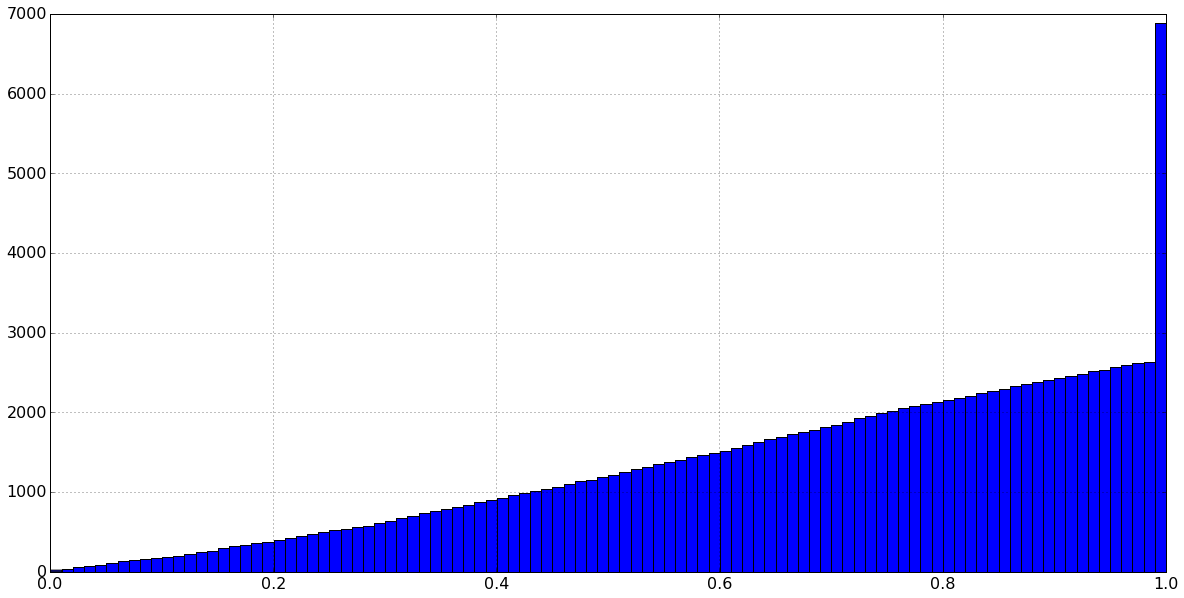

In [220]:
#REpartition de la perte en pourcentage entre ]0,1[
df[(df.variation_en_proportion>0) & (df.variation_en_proportion<=1)].variation_en_proportion.hist(bins=100, figsize =(20,10),cumulative=True)

In [221]:
df[(df.variation_en_proportion>0.1)&(df.variation_en_proportion<1)].shape

(2476, 872)

In [222]:
df[df.variation_en_proportion==1][revenu_mois_list+sit_mois_list+['sali','choi','rsti']] #on voit une grande partie des problèmes...

,revi_mois1,revi_mois2,revi_mois3,revi_mois4,revi_mois5,revi_mois6,revi_mois7,revi_mois8,revi_mois9,revi_mois10,revi_mois11,revi_mois12,situation_mois1,situation_mois2,situation_mois3,situation_mois4,situation_mois5,situation_mois6,situation_mois7,situation_mois8,situation_mois9,situation_mois10,situation_mois11,situation_mois12,sali,choi,rsti
7,0.000000,0.000000,0.000000,0.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,0.000000,0.000000,0.000000,2,2,2,2,1,1,1,1,1,3,3,3,12420,0,0
14,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,677.000000,677.000000,677.000000,677.000000,5,5,5,5,5,3,3,5,1,1,1,1,2708,0,0
17,989.666667,989.666667,989.666667,989.666667,989.666667,989.666667,989.666667,989.666667,989.666667,0.000000,0.000000,0.000000,1,1,1,1,1,1,1,1,1,2,2,2,8907,0,0
37,0.000000,0.000000,0.000000,0.000000,0.000000,607.428571,607.428571,607.428571,607.428571,607.428571,607.428571,607.428571,5,5,5,5,5,3,3,3,3,3,3,3,0,4252,0
87,0.000000,0.000000,0.000000,0.000000,0.000000,1838.250000,1838.250000,1838.250000,1838.250000,0.000000,0.000000,0.000000,3,3,3,3,3,1,1,1,1,3,3,3,7353,0,0
89,0.000000,0.000000,0.000000,1419.500000,1419.500000,0.000000,0.000000,0.000000,0.000000,1419.500000,1419.500000,0.000000,2,2,2,1,1,2,2,2,2,1,1,2,5678,2297,0
136,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000,0.000000,0.000000,0.000000,1,1,1,1,1,1,1,1,1,2,2,2,7173,0,0
179,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1029.000000,1029.000000,1029.000000,2,2,2,2,2,2,2,2,2,1,1,1,3087,0,0
195,1412.500000,1412.500000,1412.500000,1412.500000,1412.500000,1412.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3,3,3,3,3,3,1,1,1,1,1,1,0,8475,0
215,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1039.333333,1039.333333,1039.333333,1039.333333,1039.333333,1039.333333,5,5,5,3,3,3,1,1,1,1,1,1,6236,0,0


In [223]:
df[(df.variation_en_proportion>0.1)&(df.variation_en_proportion<1)]

,noindiv,aac,acesse,acessep,acontr,acper,actanc,acteu,acteu5,acteu6,acteu6cj,acteu6pr,actop,actrec,actrec_mois1,actrec_mois10,actrec_mois11,actrec_mois12,actrec_mois2,actrec_mois3,actrec_mois4,actrec_mois5,actrec_mois6,actrec_mois7,actrec_mois8,...,sortie_etudes_to_cho12,sortie_etudes_to_inact2,sortie_etudes_to_inact3,sortie_etudes_to_inact4,sortie_etudes_to_inact5,sortie_etudes_to_inact6,sortie_etudes_to_inact7,sortie_etudes_to_inact8,sortie_etudes_to_inact9,sortie_etudes_to_inact10,sortie_etudes_to_inact11,sortie_etudes_to_inact12,sortie_etudes_to_act2,sortie_etudes_to_act3,sortie_etudes_to_act4,sortie_etudes_to_act5,sortie_etudes_to_act6,sortie_etudes_to_act7,sortie_etudes_to_act8,sortie_etudes_to_act9,sortie_etudes_to_act10,sortie_etudes_to_act11,sortie_etudes_to_act12,diff_rev,variation_en_proportion
6,900000501,0,0,0,0,0,1,1,1,1,1,3,1,2,2,2,2,2,2,4,4,4,4,4,4,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,146.028571,0.166049
13,900001001,0,0,2,0,0,1,1,2,1,1,1,1,1,2,2,2,2,2,2,2,2,2,4,4,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2171.900000,0.696345
36,900002901,0,0,0,0,1,1,1,1,1,0,1,1,3,2,2,2,4,2,2,2,2,2,2,2,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2333.363636,0.757832
168,900010303,2,0,0,0,1,2,2,3,3,1,1,2,4,2,4,4,4,2,4,2,4,4,4,4,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1634.333333,0.736297
182,900010901,1,1,2,0,0,2,2,3,3,6,3,2,4,4,4,2,4,4,4,4,4,4,4,4,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,818.500000,0.511083
245,900014802,1,1,0,0,1,2,2,3,3,3,1,2,4,4,4,4,4,4,2,2,2,2,2,2,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1029.485714,0.794181
259,900015503,0,0,6,0,0,1,1,1,1,1,1,1,3,4,2,2,2,4,4,4,4,4,2,4,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,629.314286,0.497246
271,900016301,1,8,7,1,0,1,1,1,1,6,1,1,3,4,4,2,2,4,4,4,4,4,4,4,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,3251.700000,0.981793
292,900017703,2,0,0,0,2,2,2,3,3,0,3,2,4,2,4,4,4,2,2,2,2,2,2,2,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,972.333333,0.786253
295,900017901,0,0,0,0,2,1,1,1,1,0,1,1,2,4,4,4,4,4,4,2,2,2,2,2,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1454.666667,0.728669


In [224]:
df['revenu_imposable_annuel'] = df['sali'] + df['rsti'] + df['choi']

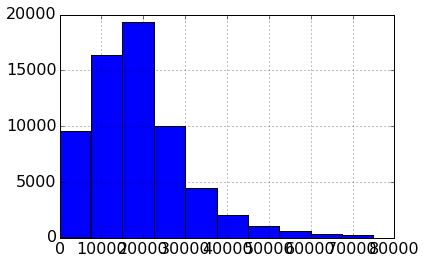

In [225]:
hello = df[(df.revenu_imposable_annuel>0)&(df.revenu_imposable_annuel<75000)].revenu_imposable_annuel.hist(bins = 10)

In [226]:
count,division = np.histogram(df[(df.revenu_imposable_annuel>0)].revenu_imposable_annuel,bins=10)

In [227]:
bins = df[(df.revenu_imposable_annuel>0)&(df.revenu_imposable_annuel<175000)].revenu_imposable_annuel.quantile(np.arange(0,1.1,0.1));bins

0.0         1.0
0.1      5433.6
0.2      9328.0
0.3     12375.0
0.4     14983.0
0.5     17229.0
0.6     19605.0
0.7     22493.0
0.8     26622.4
0.9     34085.2
1.0    173976.0
dtype: float64

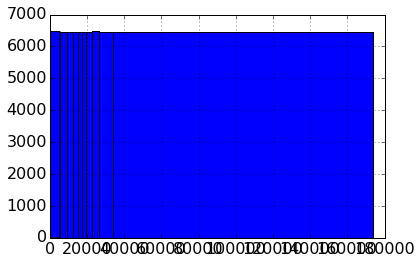

In [228]:
df[(df.revenu_imposable_annuel>0)&(df.revenu_imposable_annuel<175000)].revenu_imposable_annuel.hist( bins = bins.values, range = (0,20000))

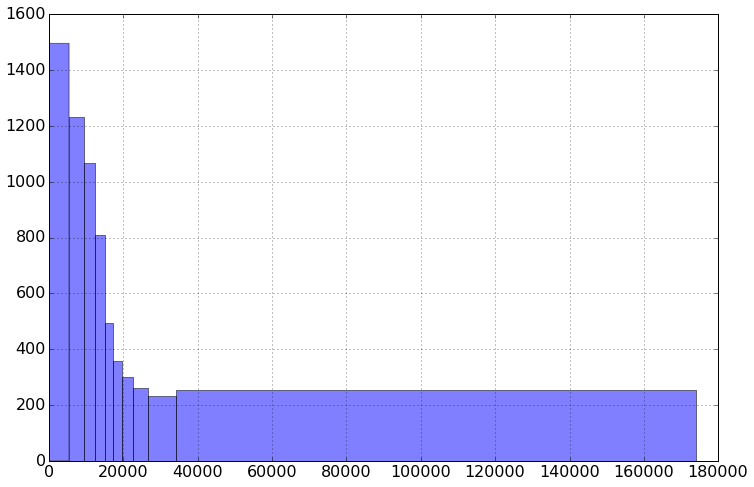

In [229]:
rev_max = 175000
df[((df.revenu_imposable_annuel>0)&
    (df.revenu_imposable_annuel<rev_max)) &
   (df.variation_en_proportion>0.2)].revenu_imposable_annuel.hist(
            bins = np.append(bins.values, rev_max), 
            figsize = (12,8),
            #normed = True,stacked = False,
            alpha = 0.5)

In [230]:
df[((df.revenu_imposable_annuel>0)&(df.revenu_imposable_annuel<rev_max)) & (df.variation_en_proportion>0.2)].shape

(6504, 873)

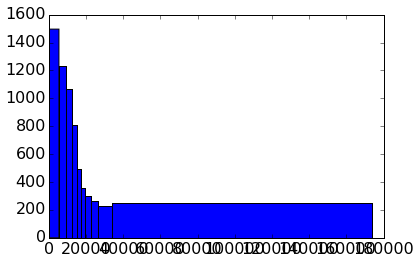

In [231]:
rev_max = 175000
bins_to_graph = df[(df.revenu_imposable_annuel>0)&
                   (df.revenu_imposable_annuel<175000)].revenu_imposable_annuel.quantile(np.arange(0,1.1,0.1))
n,bins,patches = plt.hist(df[((df.revenu_imposable_annuel>0)&
                              (df.revenu_imposable_annuel<rev_max)) & 
                             (df.variation_en_proportion>0.2)].revenu_imposable_annuel.values, 
                              bins= bins_to_graph.values)
#plt.setp(n[0]=198)
#plt.show()
#plt.setp()

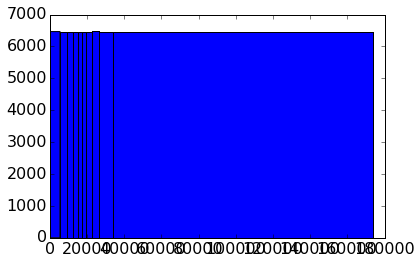

In [232]:
rev_max = 175000
bins_to_graph = df[(df.revenu_imposable_annuel>0)&(df.revenu_imposable_annuel<175000)].revenu_imposable_annuel.quantile(np.arange(0,1.1,0.1))
n2,bins2,patches2 = plt.hist(df[((df.revenu_imposable_annuel>0)&
                                 (df.revenu_imposable_annuel<rev_max))].revenu_imposable_annuel.values,
                             bins= bins_to_graph.values)


In [233]:
n/n2

array([ 0.23129252,  0.19050564,  0.1652752 ,  0.12538652,  0.0762214 ,
        0.05535797,  0.04623473,  0.04049459,  0.03571429,  0.03911565])

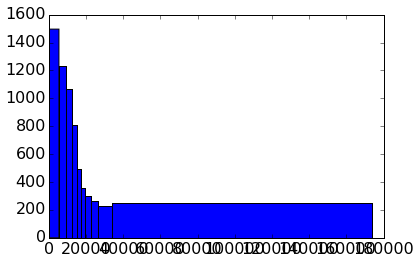

In [234]:

plt.hist(df[((df.revenu_imposable_annuel>0)&
                              (df.revenu_imposable_annuel<rev_max)) & 
                             (df.variation_en_proportion>0.2)].revenu_imposable_annuel.values, 
                              bins= bins_to_graph.values)
plt.tick_params()
#plt.yticks(n)

In [235]:
n.shape

(10,)

In [236]:
bins2[1::]

array([   5433.6,    9328. ,   12375. ,   14983. ,   17229. ,   19605. ,
         22493. ,   26622.4,   34085.2,  173976. ])

In [237]:
width_list = []
for i in range(0,bins2.shape[0]-1):
    width_list.append(bins2[i]-bins2[i+1])
    
    

In [238]:
width_list

[-5432.6000000000004,
 -3894.3999999999996,
 -3047.0,
 -2608.0,
 -2246.0,
 -2376.0,
 -2888.0,
 -4129.4000000000015,
 -7462.8000000000029,
 -139890.79999999999]

<Container object of 10 artists>

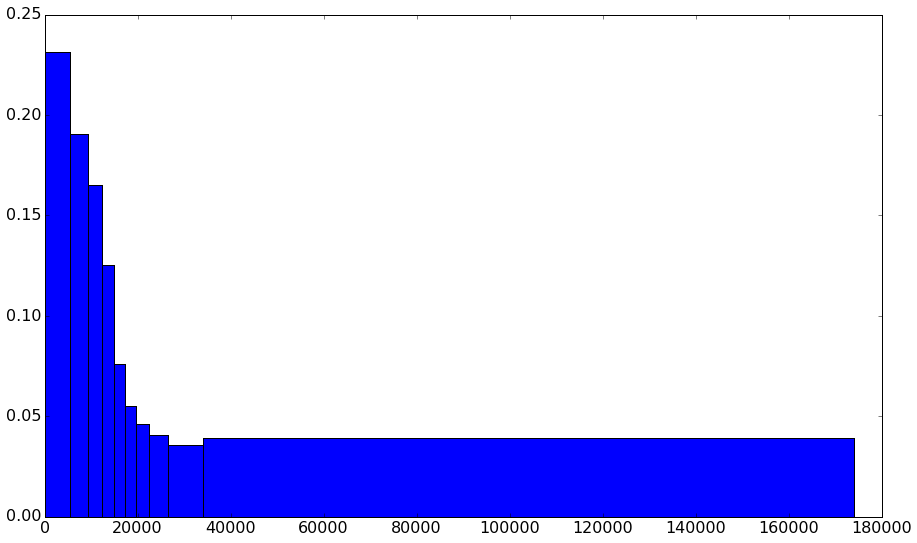

In [239]:
plt.figure(figsize=(15,9))
plt.bar( bins2[1::], n/n2,width = width_list)


In [240]:
bins2
n/n2

array([ 0.23129252,  0.19050564,  0.1652752 ,  0.12538652,  0.0762214 ,
        0.05535797,  0.04623473,  0.04049459,  0.03571429,  0.03911565])

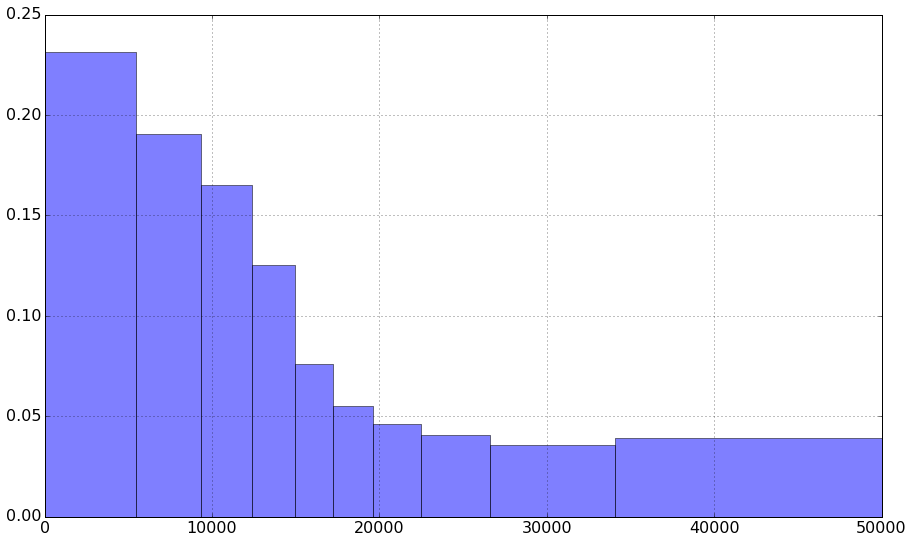

In [241]:
plt.figure(figsize=(15,9))
plt.bar( bins2[1::], n/n2,width = width_list, alpha = 0.5)
plt.grid()
plt.xlim([0,50000])
plt.savefig("part_plus_de_20_prct_par_decile.png")

In [242]:
from openfisca_utils import make_ready_to_use_simulation
from openfisca_core import rates
simulation = make_ready_to_use_simulation.make_ready_to_use_simulation(2009,False)
rbg_test_case = simulation.calculate('rbg')
irpp_test_case = simulation.calculate('irpp')
marginal_rate = rates.marginal_rate(irpp_test_case, rbg_test_case)-1
to_change = pd.Series(marginal_rate)[marginal_rate>1].index
#to_change = pd.Series(rates.marginal_rate(irpp_test_case, rbg_test_case)-1)[rates.marginal_rate(irpp_test_case, rbg_test_case)-1>1].index
marginal_rate[to_change] = marginal_rate[to_change+1]
plt.plot(marginal_rate)

SyntaxError: 'return' outside function (ir.py, line 419)

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.bar( bins2[1::], n/n2,width = width_list, alpha = 0.5)
ax1.grid()
ax1.set_xlim([0,50000])

ax2 = plt.twinx()
ax2.plot(rbg_test_case[1:],marginal_rate, 'k', label = "marginal tax rate")
ax2.set_xlim(0,50000)
ax2.legend()

ax1.set_ylabel('share of the decile')
ax1.set_xlabel("Gross income")

#ax1.savefig("part_plus_de_20_prct_par_decile.png")


In [ ]:
#plt.hist(n=n,bins=bins)
plt.bar(n,bins_to_graph.values[0:10],width = [100,1,1,1,1,1,1,100,100,100] )

In [ ]:
hist2[0]

In [ ]:
hist2

In [ ]:
df[((df.revenu_imposable_annuel>0)&(df.revenu_imposable_annuel<175000)) & (df.variation_en_proportion>0.1)].revenu_imposable_annuel

In [ ]:
df[(df.revenu_imposable_annuel>0)].revenu_imposable_annuel.quantile(0.5)

In [ ]:
dates = pd.date_range('2009','2010', freq = 'M')
dates

In [ ]:
df[(df.rga == 1)|(df.rga == 5)|(df.rga == 6)][
    ["gain_emploi_mois{}".format(mois) for mois in range(2,13)] +
    ["gain_emploi_mois{}".format(mois) for mois in range(2,13)]

    ].sum(skipna=True).plot(kind='bar', stacked = True)

In [ ]:
(df[(df.rga == 1)|(df.rga == 5)|(df.rga == 6)][changement_situation_mois_list].sum(skipna=True)/
df[(df.rga == 1)|(df.rga == 5)|(df.rga == 6)][changement_situation_mois_list].count()
).plot(kind='bar')

In [ ]:
pd.melt(df[sit_mois_list])

In [ ]:
df.rga.value_counts()

In [ ]:
df[df.changement_situation_mois10==True][['nb_sit_mois_null','quelfic']+sit_mois_list+['age','trim','sali','rsti','rga']]

In [ ]:
df.rga.value_counts()
    

In [ ]:
dfmois = pd.DataFrame()
for chgmt in nb_chgmt_mois_list:
    temp_df = pd.DataFrame()
    pd.concat(dfmois, )
    dfmois.df[chgmt].value_counts()[1]

In [ ]:
dfmois

In [ ]:
dfmois = pd.Series()
temp_df = pd.Series()

In [ ]:
temp_df['nb_chgmt'] = df["chgmt_sit_mois{}".format(month)].value_counts()[1]
temp_df['mois'] = mois

In [ ]:
temp_df.append(temp_df)

In [ ]:
df.chgmt_sit_mois12.value_counts()[1]

In [ ]:
df.changement_situation_mois10.isnull().all()

In [ ]:
#essai histogram decile

In [ ]:

data = np.random.normal(size=10000)*10000

#plt.figure(0)
#plt.hist(data, bins=np.arange(data.min(), data.max(), 1000))


In [ ]:
plt.hist(data, bins = 100)

In [ ]:
data = pd.Series(data)

In [ ]:
bins = data.quantile(np.arange(0,1.1,0.1))

In [ ]:
bins

In [ ]:
data.hist(bins = bins, normed = True)

In [ ]:
data.hist(bins = bins, normed = True,stacked = False, cumulative = True)

In [ ]:
bins